# Part I - (Prosper Loan Data Exploration)
## by Akingbeni David

## Introduction
> The prosper loan dataset is a table of 130K+ entries and 81 columns that are called features. These features dynamically provide information on each loan entry and specific information such as the borrower's APR, loan status e.t.c.
This dataset was among the optional datasets that Udacity provided for data vizulization project,from which I chose I chose this beacuse of my flair for the world of finance, retail and business

> Suggestions: You might need to have a surface knowledge of some financial terms that were used to describe the columns but I will do well to give a good definition for all columns that I will be using.


## Preliminary Wrangling


In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline

In [16]:
warnings.filterwarnings("ignore")

In [17]:
plt.style.use("fivethirtyeight")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [18]:
#Load the dataset and inspect the data

loan_master = pd.read_csv("Dataset/prosperLoanData.csv")
loan_master.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Trailer for my story

Hi, my name is Akingbeni Data and I am about to prove to you why visualizations of data matters a lot.

## Story Time
With almost no  experience with analysing a "deeply" financial dataset like the loan data I just loaded above, the first thing I did after seeing this dataset was to take a powernap of about 30 minutes... Yeah, it worked and I just came back motivated to understand this dataset, its variables a.k.a the features, a.k.a the columns.

To do this, I will be using MS excel to visually inspect (No worries, you won't miss out a bit on the data story I am about to tell you) alongsides my pythonized jupyter notebook.

Follow me and I'll make this as fun as it should be... All work and no play, makes "{}".format(your_name) a ... LOL...

PS: This is one of my final projects on Udacity data analysis program...

In [19]:
#Chcek the general shape of the data, general information

print(loan_master.shape)
print(loan_master.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

### What is the structure of your dataset?

>- The `loan_master` data is a structured (Tabular) datast of 113937 rows and 81 columns.
>- Memory usage of 68m.b

### What is/are the main feature(s) of interest in your dataset?

>- LoanStatus: Possibly a major dependent variable, as it tells what is the current status of the loan.
>- Loan Original Amount: The origination amount of the loan.
>- ProsperRating: Prosper propriety rating that shows the level of risk of a particular loan listing (Interval/Ordinal data) Lowest - AA to Highest Risk - HR (AA, A, B, C, D, E, HR).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>- Credit Grade: This is an object datatype that rates if a person will default on the loan as rated by an external body(This is an ordianl datatype)
>- Term: This is length of agreement in months. (Integers)
>- BorrowersAPR: The total charges incurred on a loan including the nominal interest rate charged (Float).
>- ListingCategory: Appears to be what the loan is used for. Key and meaning ---> 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans. (Nominal Data type)
>- BorrowerState: Abbreviation of the state that a borrower is from. (String)
>- Employment Status: This tells the  employment status of borrower. (Category data but not ordered)
>- Currently in group (True or False if in a group).
>- FirstRecordedCreditline: This record the first time the first credit was opened which could be synonymous to the age of an individual (Possible feature engineeer to calculate how long they have been using credit lines)
>- OpenCreditlines: The number of Creditlines open or in use at the moment.
>- OpenRevolving Monthly Payments: This is the monthly payment made from the revolving account(s) an entity possesses.
>- ChangeIninquiries: This is not an actual column. I would be performing feature engineering on two columns (totalinquiries and sixmonthsinquiries)
>- AmountDelinquent: This is similar to the amount a person has defaulted in dollars on the entity's credit profile.(I will add this to a main feature/dependent feature to look out for)
>- Change in amount of Delinquencies: This is going to be a feature engineered column that will consist of the change in the current delinquecies and delinquencies in past 7 years.
>- Change in public record (10 Years and 12 months). Also a feature engineering of two columns
>- Debt to income ratio: The debt to income ratio is a ratio for evaluating a entity's strength to take on extra debt financing.
>- Income Range: The income range of each entity. This is an ordinal data.
>- StatedMonthly Income: The exact income of each entity, and should be in float
>- Monthly Loan Payment: The monthly payment on each loan
>- ScorexChangeAtTimeOfListing: The borrower score rating change since the last time an entity borrowed money from Prosper Loan. (Goes from a negative value to positive values)
>- ListingCreationDate: The day that the listing was made

Having selected the features of interest, I will go ahead with subsetting the loan_master dataset to carry only the specified columns.

In [20]:
column_list = ["LoanStatus", "TotalProsperLoans", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
               "ProsperPrincipalBorrowed", "ProsperPaymentsOneMonthPlusLate", "ProsperRating (Alpha)", 
               "CreditGrade", "BorrowerAPR", "ListingCategory (numeric)", "BorrowerState", "EmploymentStatus", 
               "CurrentlyInGroup", "FirstRecordedCreditLine", "OpenCreditLines", "OpenRevolvingAccounts", 
               "OpenRevolvingMonthlyPayment", "InquiriesLast6Months", 
               "TotalInquiries", "AmountDelinquent", "CurrentDelinquencies", "DelinquenciesLast7Years",
               "PublicRecordsLast12Months", "PublicRecordsLast10Years", "DebtToIncomeRatio", 
               "IncomeRange", "StatedMonthlyIncome", "IncomeVerifiable", "LoanOriginalAmount",
               "MonthlyLoanPayment", "ScorexChangeAtTimeOfListing", "Term", "ListingCreationDate"]

In [21]:
loan_df = loan_master[column_list]
loan_df.head()

,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPrincipalBorrowed,ProsperPaymentsOneMonthPlusLate,ProsperRating (Alpha),CreditGrade,BorrowerAPR,ListingCategory (numeric),...,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,ScorexChangeAtTimeOfListing,Term,ListingCreationDate
0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,C,0.16516,0,...,0.0,0.17,"$25,000-49,999",3083.333333,True,9425,330.43,NaN,36,2007-08-26 19:09:29.263000000
1,Current,NaN,NaN,NaN,NaN,NaN,A,NaN,0.12016,2,...,1.0,0.18,"$50,000-74,999",6125.000000,True,10000,318.93,NaN,36,2014-02-27 08:28:07.900000000
2,Completed,NaN,NaN,NaN,NaN,NaN,NaN,HR,0.28269,0,...,0.0,0.06,Not displayed,2083.333333,True,3001,123.32,NaN,36,2007-01-05 15:00:47.090000000
3,Current,NaN,NaN,NaN,NaN,NaN,A,NaN,0.12528,16,...,0.0,0.15,"$25,000-49,999",2875.000000,True,10000,321.45,NaN,36,2012-10-22 11:02:35.010000000
4,Current,1.0,11.0,0.0,11000.0,0.0,D,NaN,0.24614,2,...,0.0,0.26,"$100,000+",9583.333333,True,15000,563.97,NaN,36,2013-09-14 18:38:39.097000000


In [22]:
#Load description data

description = pd.read_excel("Dataset/Prosper Loan Data - Variable Definitions.xlsx")

In [23]:
description  #Using Excel to fully view the particular dataset will be helpful

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.
...,...,...
76,PercentFunded,Percent the listing was funded.
77,Recommendations,Number of recommendations the borrower had at ...
78,InvestmentFromFriendsCount,Number of friends that made an investment in t...
79,InvestmentFromFriendsAmount,Dollar amount of investments that were made by...


In [24]:
#Check information and begin assessing the loan_df
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   LoanStatus                           113937 non-null  object 
 1   TotalProsperLoans                    22085 non-null   float64
 2   OnTimeProsperPayments                22085 non-null   float64
 3   ProsperPaymentsLessThanOneMonthLate  22085 non-null   float64
 4   ProsperPrincipalBorrowed             22085 non-null   float64
 5   ProsperPaymentsOneMonthPlusLate      22085 non-null   float64
 6   ProsperRating (Alpha)                84853 non-null   object 
 7   CreditGrade                          28953 non-null   object 
 8   BorrowerAPR                          113912 non-null  float64
 9   ListingCategory (numeric)            113937 non-null  int64  
 10  BorrowerState                        108422 non-null  object 
 11  EmploymentSta

In [25]:
#Check unique values of 
loan_df.CreditGrade.unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [26]:
#Check if null values of Prosper rating all have Credit Grade rating.

null_rating = loan_df["ProsperRating (Alpha)"].isnull()
sum(loan_df[null_rating].CreditGrade.notnull())

28953

In [27]:
#Check number of CreditGrade values in the origianl loan_df
sum(loan_df["CreditGrade"].notnull())

28953

Since the total number of values of CreditGrade in the dataframe subsetted by when Prosperrating is null/empty is equal to the total number of CreditGrade in the original loan_df, this means that there was an attempt to fill the null prosper Ratings with an alternative rating, the Creditgrading (which is a public rating for credits).

This makes sense as when propser do not have anough antecedents to evaluate an entity, they try to fill it with a general similar rating, which uses the same key.

#### Check the distribution and boxplot of BorrowerAPR

<AxesSubplot:xlabel='BorrowerAPR'>

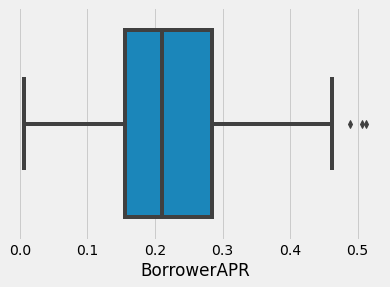

In [28]:
sb.boxplot(loan_df.BorrowerAPR)

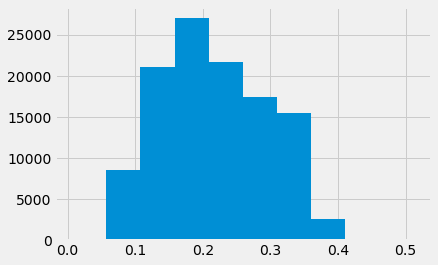

In [29]:
plt.hist(loan_df.BorrowerAPR);

The boxplot shows that there are only a few outliers in the borrower APR dataset. Thus replacing missing values with the mean would be a good idea

In [30]:
#Check Values of Employment Status

loan_df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

#### Check percentage of mssing values in each column]

In [31]:
#Check percentage of mssing values in each column]

100*(loan_df.isnull().sum()/loan_df.shape[0])

LoanStatus                              0.000000
TotalProsperLoans                      80.616481
OnTimeProsperPayments                  80.616481
ProsperPaymentsLessThanOneMonthLate    80.616481
ProsperPrincipalBorrowed               80.616481
ProsperPaymentsOneMonthPlusLate        80.616481
ProsperRating (Alpha)                  25.526387
CreditGrade                            74.588588
BorrowerAPR                             0.021942
ListingCategory (numeric)               0.000000
BorrowerState                           4.840394
EmploymentStatus                        1.979164
CurrentlyInGroup                        0.000000
FirstRecordedCreditLine                 0.611742
OpenCreditLines                         6.673864
OpenRevolvingAccounts                   0.000000
OpenRevolvingMonthlyPayment             0.000000
InquiriesLast6Months                    0.611742
TotalInquiries                          1.017229
AmountDelinquent                        6.689662
CurrentDelinquencies

In [32]:
#Ensuring only Yes and No is what is filled in CurrentlyInGroup column

loan_df.CurrentlyInGroup.unique()

array([ True, False])

In [33]:
#check for missing values in the missing First Recorded CreditLine
pd.set_option('display.max_columns', 40)

loan_df[loan_df.FirstRecordedCreditLine.isnull()]

,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPrincipalBorrowed,ProsperPaymentsOneMonthPlusLate,ProsperRating (Alpha),CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,EmploymentStatus,CurrentlyInGroup,FirstRecordedCreditLine,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,AmountDelinquent,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,ScorexChangeAtTimeOfListing,Term,ListingCreationDate
206,Defaulted,NaN,NaN,NaN,NaN,NaN,NaN,D,0.27767,0,NaN,NaN,False,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16573,Not displayed,9166.666667,True,7500,306.19,NaN,36,2006-03-25 13:09:11.680000000
387,Completed,NaN,NaN,NaN,NaN,NaN,NaN,B,0.09337,0,NaN,NaN,False,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12624,Not displayed,3000.000000,True,3500,110.73,NaN,36,2006-03-02 17:49:16.430000000
698,Completed,NaN,NaN,NaN,NaN,NaN,NaN,AA,0.07680,0,NaN,NaN,False,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02727,Not displayed,8333.333333,True,6001,185.29,NaN,36,2006-02-07 12:01:25.260000000
794,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NC,0.29776,0,NaN,Not available,False,NaN,NaN,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Not displayed,115.583333,True,4000,167.62,NaN,36,2007-02-11 13:40:55.490000000
802,Defaulted,NaN,NaN,NaN,NaN,NaN,NaN,D,0.29776,0,MO,Not available,True,NaN,NaN,1,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Not displayed,960.000000,True,2500,104.76,NaN,36,2006-10-20 11:15:06.197000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113015,Completed,NaN,NaN,NaN,NaN,NaN,NaN,B,0.12700,0,NaN,NaN,False,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08128,Not displayed,3250.000000,True,5000,166.07,NaN,36,2006-04-03 20:54:49.090000000
113438,Completed,NaN,NaN,NaN,NaN,NaN,NaN,B,0.08684,0,NaN,NaN,False,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.31080,Not displayed,5833.333333,True,3000,46.80,NaN,36,2006-02-15 15:17:54.273000000
113848,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NC,0.30709,0,NaN,Not available,False,NaN,NaN,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Not displayed,833.333333,True,1000,0.00,NaN,36,2007-02-07 15:04:40.563000000
113902,Completed,NaN,NaN,NaN,NaN,NaN,NaN,A,0.08805,0,NaN,NaN,False,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07419,Not displayed,20833.333333,True,7500,235.44,NaN,36,2006-03-26 00:11:04.620000000


In [34]:
loan_df[loan_df.FirstRecordedCreditLine.isnull()]["OpenCreditLines"].value_counts()

1.0    19
0.0     1
Name: OpenCreditLines, dtype: int64

In [35]:
#check the TotalInquiries value counts that have been pull up on the 
loan_df[loan_df.FirstRecordedCreditLine.isnull()]["TotalInquiries"].value_counts()

0.0    99
Name: TotalInquiries, dtype: int64

In [36]:
loan_df[loan_df.FirstRecordedCreditLine.isnull()]["ListingCategory (numeric)"].value_counts()

0    691
4      3
7      1
2      1
6      1
Name: ListingCategory (numeric), dtype: int64

Given the above, we cannot totally identify the date where their first recorded creditline is...

#### Checking missing values of missing OpenCreditline

In [37]:
loan_df["OpenCreditLines"].unique()

array([ 4., 14., nan,  5., 19., 17.,  7.,  6., 16.,  2.,  8., 22.,  9.,
       15., 21.,  0.,  3., 11., 18., 12., 13., 10., 28., 25., 20., 24.,
        1., 27., 37., 26., 32., 23., 29., 35., 34., 30., 38., 31., 33.,
       40., 42., 54., 39., 43., 36., 41., 44., 45., 48., 51., 46., 47.,
       49.])

In [38]:
loan_df[loan_df.OpenCreditLines.isnull()]

,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPrincipalBorrowed,ProsperPaymentsOneMonthPlusLate,ProsperRating (Alpha),CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,EmploymentStatus,CurrentlyInGroup,FirstRecordedCreditLine,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,AmountDelinquent,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,ScorexChangeAtTimeOfListing,Term,ListingCreationDate
2,Completed,NaN,NaN,NaN,NaN,NaN,NaN,HR,0.28269,0,GA,Not available,True,2002-07-27 00:00:00,NaN,0,0.0,0.0,1.0,NaN,1.0,0.0,NaN,0.0,0.06000,Not displayed,2083.333333,True,3001,123.32,NaN,36,2007-01-05 15:00:47.090000000
17,Chargedoff,NaN,NaN,NaN,NaN,NaN,NaN,AA,0.13202,0,NaN,Not available,True,1990-05-19 00:00:00,NaN,16,346.0,7.0,17.0,NaN,2.0,0.0,NaN,0.0,0.12000,Not displayed,5833.333333,True,10000,334.54,NaN,36,2006-08-15 12:21:09.433000000
39,Completed,NaN,NaN,NaN,NaN,NaN,NaN,B,0.15211,0,NaN,NaN,False,1994-11-01 00:00:00,NaN,4,278.0,1.0,3.0,NaN,0.0,0.0,NaN,0.0,0.06000,Not displayed,9583.333333,True,10000,57.64,NaN,36,2006-07-11 17:14:14.647000000
42,Chargedoff,NaN,NaN,NaN,NaN,NaN,NaN,HR,0.30300,0,NaN,Not available,False,1997-10-24 00:00:00,NaN,0,0.0,1.0,9.0,NaN,14.0,3.0,NaN,0.0,0.27000,Not displayed,416.666667,True,1500,62.86,NaN,36,2007-02-04 17:24:27.850000000
63,Completed,NaN,NaN,NaN,NaN,NaN,NaN,D,0.29776,0,MO,Not available,False,2000-05-16 00:00:00,NaN,3,376.0,7.0,20.0,NaN,0.0,0.0,NaN,0.0,0.25000,Not displayed,7500.000000,True,6000,251.43,NaN,36,2006-10-07 00:32:48.020000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113848,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NC,0.30709,0,NaN,Not available,False,NaN,NaN,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Not displayed,833.333333,True,1000,0.00,NaN,36,2007-02-07 15:04:40.563000000
113902,Completed,NaN,NaN,NaN,NaN,NaN,NaN,A,0.08805,0,NaN,NaN,False,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07419,Not displayed,20833.333333,True,7500,235.44,NaN,36,2006-03-26 00:11:04.620000000
113914,Defaulted,NaN,NaN,NaN,NaN,NaN,NaN,HR,0.25757,0,CA,NaN,True,1998-10-23 00:00:00,NaN,0,0.0,9.0,12.0,NaN,9.0,16.0,NaN,0.0,0.05000,Not displayed,2400.000000,True,3000,119.28,NaN,36,2006-08-09 14:34:40.010000000
113921,Completed,NaN,NaN,NaN,NaN,NaN,NaN,AA,NaN,0,NaN,NaN,False,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23284,Not displayed,12500.000000,True,1000,29.52,NaN,36,2005-11-09 20:44:28.847000000


#### Checking missing values of missing Amount_Deliquent

In [39]:
loan_df.AmountDelinquent.describe()

count    106315.000000
mean        984.507059
std        7158.270157
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      463881.000000
Name: AmountDelinquent, dtype: float64

<AxesSubplot:xlabel='AmountDelinquent'>

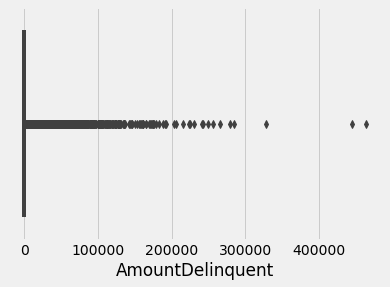

In [40]:
sb.boxplot(loan_df.AmountDelinquent)

In [41]:
#Check the amount deliquent that is not equal to zero
loan_df[loan_df.AmountDelinquent != 0]

,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPrincipalBorrowed,ProsperPaymentsOneMonthPlusLate,ProsperRating (Alpha),CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,EmploymentStatus,CurrentlyInGroup,FirstRecordedCreditLine,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,AmountDelinquent,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,ScorexChangeAtTimeOfListing,Term,ListingCreationDate
0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,C,0.16516,0,CO,Self-employed,True,2001-10-11 00:00:00,4.0,1,24.0,3.0,3.0,472.0,2.0,4.0,0.0,0.0,0.17000,"$25,000-49,999",3083.333333,True,9425,330.43,NaN,36,2007-08-26 19:09:29.263000000
2,Completed,NaN,NaN,NaN,NaN,NaN,NaN,HR,0.28269,0,GA,Not available,True,2002-07-27 00:00:00,NaN,0,0.0,0.0,1.0,NaN,1.0,0.0,NaN,0.0,0.06000,Not displayed,2083.333333,True,3001,123.32,NaN,36,2007-01-05 15:00:47.090000000
3,Current,NaN,NaN,NaN,NaN,NaN,A,NaN,0.12528,16,GA,Employed,False,1983-02-28 00:00:00,5.0,7,115.0,0.0,1.0,10056.0,4.0,14.0,0.0,0.0,0.15000,"$25,000-49,999",2875.000000,True,10000,321.45,NaN,36,2012-10-22 11:02:35.010000000
10,Current,NaN,NaN,NaN,NaN,NaN,C,NaN,0.27462,1,MD,Employed,False,1989-11-29 00:00:00,2.0,4,25.0,1.0,2.0,253.0,1.0,28.0,0.0,1.0,0.12000,"$75,000-99,999",7500.000000,True,13500,395.37,NaN,60,2012-05-10 07:04:01.577000000
11,Completed,NaN,NaN,NaN,NaN,NaN,NaN,C,0.15033,0,NaN,Full-time,False,2000-11-13 00:00:00,2.0,1,40.0,3.0,5.0,2224.0,3.0,1.0,0.0,0.0,0.27000,"$1-24,999",1666.666667,True,1000,33.81,NaN,36,2007-10-09 20:28:33.640000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113920,Current,2.0,26.0,0.0,12000.0,0.0,HR,NaN,0.35356,1,NJ,Employed,False,1998-10-12 00:00:00,14.0,6,492.0,10.0,19.0,20235.0,1.0,3.0,0.0,0.0,0.25000,"$50,000-74,999",5208.333333,True,4000,172.76,9.0,36,2013-06-11 05:49:40.247000000
113921,Completed,NaN,NaN,NaN,NaN,NaN,NaN,AA,NaN,0,NaN,NaN,False,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23284,Not displayed,12500.000000,True,1000,29.52,NaN,36,2005-11-09 20:44:28.847000000
113926,Defaulted,NaN,NaN,NaN,NaN,NaN,NaN,E,0.29776,0,CA,Not available,False,1996-03-26 00:00:00,NaN,0,0.0,2.0,6.0,NaN,18.0,18.0,NaN,7.0,0.07000,Not displayed,5416.666667,True,3000,125.72,NaN,36,2006-08-01 10:31:31.143000000
113933,FinalPaymentInProgress,3.0,60.0,0.0,33501.0,0.0,A,NaN,0.13220,7,PA,Employed,False,1992-01-17 00:00:00,13.0,9,495.0,1.0,4.0,5062.0,1.0,4.0,0.0,0.0,0.11000,"$75,000-99,999",8041.666667,True,2000,65.57,-26.0,36,2011-11-03 20:42:55.333000000


Only about 24K rows have dataset where the amount delinquent is not equal to zero, which makes the data so spreadout from between 0.0 to the max amount delinquent which is 48K. This makes any mean, mode or median null filling inappropriate

#### Debt to Income ratio distribution visualized

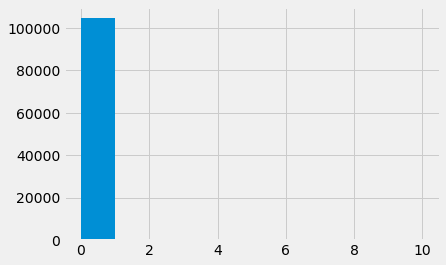

In [42]:
plt.hist(loan_df.DebtToIncomeRatio);

The above histogram shows that there is no presence of negative Debt to income Ratio (which is as expected). This also means we can replace the N/A values with a negative value to be able to identiify N/A values

#### ScoreXchange visualized

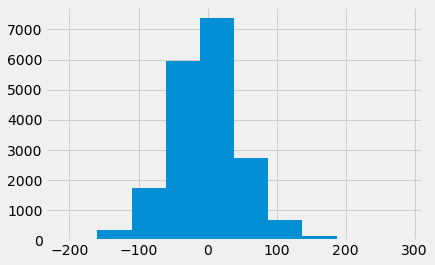

In [43]:
plt.hist(loan_df.ScorexChangeAtTimeOfListing);

In [44]:
loan_df.TotalProsperLoans.unique()

array([nan,  1.,  3.,  2.,  4.,  6.,  5.,  8.,  7.,  0.])

In [45]:
loan_df[loan_df.TotalProsperLoans == 0]

,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPrincipalBorrowed,ProsperPaymentsOneMonthPlusLate,ProsperRating (Alpha),CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,EmploymentStatus,CurrentlyInGroup,FirstRecordedCreditLine,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,AmountDelinquent,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,ScorexChangeAtTimeOfListing,Term,ListingCreationDate
105977,Completed,0.0,0.0,0.0,0.0,0.0,HR,NaN,0.38723,7,IL,Employed,False,2001-03-01 00:00:00,10.0,3,82.0,4.0,10.0,0.0,0.0,16.0,0.0,0.0,0.1,"$25,000-49,999",3500.0,True,4000,180.94,NaN,36,2010-12-02 20:22:23.610000000


(array([2.1954e+04, 6.9000e+01, 2.5000e+01, 2.1000e+01, 4.0000e+00,
        4.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 6.0000e+00]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

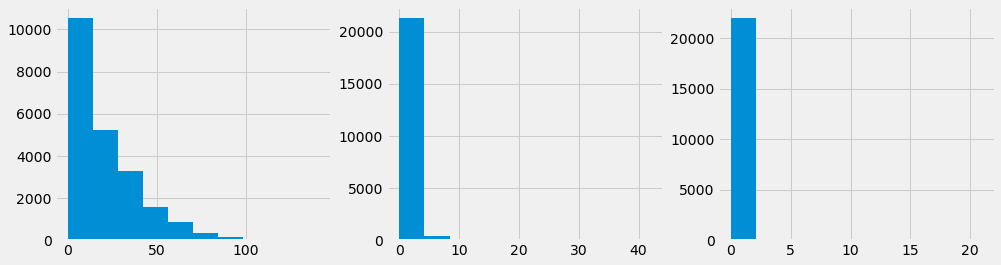

In [46]:
#Distribution of OnTimepayments, Onemonthlate and more than onemonth late payment

plt.figure(figsize = [15, 4])

plt.subplot(1, 3, 1)
plt.hist(loan_df.OnTimeProsperPayments)

plt.subplot(1, 3, 2)
plt.hist(loan_df.ProsperPaymentsLessThanOneMonthLate)

plt.subplot(1, 3, 3)
plt.hist(loan_df.ProsperPaymentsOneMonthPlusLate)

#### Check the unique values of Loan Status

In [47]:
loan_df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [48]:
#Check some values of CreditGrading when Prosperrating is null

pd.set_option("max_rows", 20)

loan_df[loan_df["ProsperRating (Alpha)"].isnull()][["CreditGrade", "ProsperRating (Alpha)"]]

,CreditGrade,ProsperRating (Alpha)
0,C,NaN
2,HR,NaN
11,C,NaN
17,AA,NaN
21,D,NaN
...,...,...
113921,AA,NaN
113922,C,NaN
113923,B,NaN
113926,E,NaN


In [49]:
loan_df.head()

,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPrincipalBorrowed,ProsperPaymentsOneMonthPlusLate,ProsperRating (Alpha),CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,EmploymentStatus,CurrentlyInGroup,FirstRecordedCreditLine,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,AmountDelinquent,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,ScorexChangeAtTimeOfListing,Term,ListingCreationDate
0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,C,0.16516,0,CO,Self-employed,True,2001-10-11 00:00:00,4.0,1,24.0,3.0,3.0,472.0,2.0,4.0,0.0,0.0,0.17,"$25,000-49,999",3083.333333,True,9425,330.43,NaN,36,2007-08-26 19:09:29.263000000
1,Current,NaN,NaN,NaN,NaN,NaN,A,NaN,0.12016,2,CO,Employed,False,1996-03-18 00:00:00,14.0,13,389.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.18,"$50,000-74,999",6125.000000,True,10000,318.93,NaN,36,2014-02-27 08:28:07.900000000
2,Completed,NaN,NaN,NaN,NaN,NaN,NaN,HR,0.28269,0,GA,Not available,True,2002-07-27 00:00:00,NaN,0,0.0,0.0,1.0,NaN,1.0,0.0,NaN,0.0,0.06,Not displayed,2083.333333,True,3001,123.32,NaN,36,2007-01-05 15:00:47.090000000
3,Current,NaN,NaN,NaN,NaN,NaN,A,NaN,0.12528,16,GA,Employed,False,1983-02-28 00:00:00,5.0,7,115.0,0.0,1.0,10056.0,4.0,14.0,0.0,0.0,0.15,"$25,000-49,999",2875.000000,True,10000,321.45,NaN,36,2012-10-22 11:02:35.010000000
4,Current,1.0,11.0,0.0,11000.0,0.0,D,NaN,0.24614,2,MN,Employed,False,2004-02-20 00:00:00,19.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.26,"$100,000+",9583.333333,True,15000,563.97,NaN,36,2013-09-14 18:38:39.097000000


### Assessing the data

- Check out and drop loans that have been cancelled.
- Replace null values of TotalProsper Loans with 0 (No prior plans) and convert dtype of integer.
- Replace null values of Ontime Prosperpayment, Onemonthlate and onemonthpluslate Loans with -1 and convert to integer.
- Replace ProsperPrincipalBorrowed null values with 0 and convert to float.
- Replace Null Values of CreditGrade with NC.
- Fill missing values of ProsperRating with the CreditGrading values and drop the CreditGrading. 
- Convert ProsperRating (Alpha) to category type with the following order as pertaining to the level of risk attached to the loan (NC > HR > E > D > C > B > A > AA) i.e. HR is the riskiest loan and AA is the least risky loan. I referenced NC (No Credit Grade) as riskiest because what you don't know is more dangerous than what you know. However, we will keep in mind that it means no credit grade.
- Replace null values of Borrower APR with the mean.
- Replace null values of Employment status with Not available. 
- Borrower state do not contain to many missing values(4%). It is also not a too critical variable, we would decide the flexibility in dealing with the missing values along the way. However, most vizualizations are "smart" enough to remove missing values.
- Leave missing values of First Recorded line as null
- Let us replace the missing values of missing number of Opencreditlines as -1. Convert datatype to int
- Replace null amount of delinquency with -999 and convert to float
- Replace null values DebttoIncomeRatio column with -10 (Which means the value is unavailable in the dataset)
- ScoreXchange is the change in the crdit score between the last time the borrower borrowed and the recent borrowing. Thus it is null if the entity has not borrowed before. 
- The Loan Status needs renaming of some values (Finalpaymentsinprogress --> Current, Past Due* --> Delinquent)
- Convert Listing Creation Date and FirstRecordedCreditLine to datetime object

## Performing cleaning as seen in the assessments above

In [50]:
#make copy

loan_df_clean = loan_df.copy()

In [51]:
#original Loan shape
loan_df_clean.shape

(113937, 33)

### Check out and drop loans that have been cancelled.

##### Define

- Use conditional slicing to drop loans_status that are cancelled

##### Code

In [52]:
loan_df_clean = loan_df_clean[loan_df_clean.LoanStatus != "Cancelled"]

##### Test

In [53]:
loan_df_clean[loan_df_clean.LoanStatus == "Cancelled"]

,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPrincipalBorrowed,ProsperPaymentsOneMonthPlusLate,ProsperRating (Alpha),CreditGrade,BorrowerAPR,ListingCategory (numeric),BorrowerState,EmploymentStatus,CurrentlyInGroup,FirstRecordedCreditLine,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,AmountDelinquent,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,ScorexChangeAtTimeOfListing,Term,ListingCreationDate


In [54]:
loan_df_clean.shape

(113932, 33)

### Replace null values of TotalProsper Loans with 0 (No prior plans) and convert dtype of integer.
- Use Fillna to fill na values with 0
- Convert datatype to integer

##### Code

In [55]:
#Fill na values with zero
loan_df_clean["TotalProsperLoans"].fillna(0, inplace = True)

In [56]:
#convert datatype to integer

loan_df_clean["TotalProsperLoans"] = loan_df_clean["TotalProsperLoans"].astype(int)

##### Test

In [57]:
sum(loan_df_clean.TotalProsperLoans.isnull())

0

In [58]:
#Check unique values of total prosper loan

print(loan_df_clean.TotalProsperLoans.unique())
print(loan_df_clean.TotalProsperLoans.dtype)

[0 1 3 2 4 6 5 8 7]
int32


### Replace null values of OntimeProsperLoans, Prosperpayment, Onemonthlate and onemonthpluslate, with -1 and convert to integer.

- fillna values of Ontimeprosper loans with 0
- conveert datatype to int

##### Code

In [59]:
#Fill na values with 0
loan_df_clean["OnTimeProsperPayments"].fillna(-1, inplace = True)

In [60]:
#Convere datatype to integer
loan_df_clean["OnTimeProsperPayments"] = loan_df_clean["OnTimeProsperPayments"].astype(int)

In [61]:
#fill ProsperPaymentsLessThanOneMonthLate na values with -1
loan_df_clean["ProsperPaymentsLessThanOneMonthLate"].fillna(-1, inplace = True)

In [62]:
#Convert datatype to integer
loan_df_clean["ProsperPaymentsLessThanOneMonthLate"] = loan_df_clean["ProsperPaymentsLessThanOneMonthLate"].astype(int)

In [63]:
#fill ProsperPaymentsOneMonthPlusLate na values with -1

loan_df_clean["ProsperPaymentsOneMonthPlusLate"].fillna(-1, inplace = True)

#Convert Datatype to integer
loan_df_clean["ProsperPaymentsOneMonthPlusLate"] = loan_df_clean["ProsperPaymentsOneMonthPlusLate"].astype(int)

##### Test

In [64]:
sum(loan_df_clean.OnTimeProsperPayments.isnull())

0

In [65]:
loan_df_clean["OnTimeProsperPayments"].dtype

dtype('int32')

In [66]:
loan_df_clean["OnTimeProsperPayments"].unique()

array([ -1,  11,  67,  12,   8,   9,  20,   1,   4,  16,   6,  10,  32,
        35,  14,   7,  28,   5,  22,  13,  24,   3,  25,  15,  46,  30,
        31,   2,  27,  18,  26,  34,  74,  54,  33,  63,  50,  21,  19,
        38,  42,  39,  61,  23,  95,  56,  53,  48,  66,   0,  76,  29,
        51,  78,  17,  52, 105,  57, 131,  36, 111,  58,  77,  55,  59,
       110,  47,  64,  37,  69,  45,  70,  89,  65,  60,  72,  44, 101,
        83,  62, 103,  92, 102,  43,  73,  49,  41,  40,  75,  68,  81,
       118,  71,  88,  80,  96,  97,  84,  79, 124,  85,  90, 104,  82,
        87,  91,  99, 100,  93,  94, 116, 119, 117, 132, 106,  86, 128,
       114, 122, 134, 107, 123, 125, 133, 121, 115, 112, 141])

In [67]:
#Check for missing values

sum(loan_df_clean.ProsperPaymentsLessThanOneMonthLate.isnull())

0

In [68]:
#Check for datatype
loan_df_clean["ProsperPaymentsLessThanOneMonthLate"].dtype

dtype('int32')

In [69]:
#Check for unique
loan_df_clean["ProsperPaymentsLessThanOneMonthLate"].unique()

array([-1,  0,  1,  3,  4,  9,  7,  2,  5, 17,  6, 14, 20,  8, 11, 12, 15,
       10, 27, 13, 24, 35, 18, 30, 19, 42, 16, 21, 22, 26, 34, 23, 29, 25,
       36, 28, 32, 40, 33, 41, 39, 31])

In [70]:
#Check for missing values

sum(loan_df_clean.ProsperPaymentsOneMonthPlusLate.isnull())

0

In [71]:
#Check for datatype
loan_df_clean["ProsperPaymentsOneMonthPlusLate"].dtype

dtype('int32')

In [72]:
#Check for unique values
loan_df_clean["ProsperPaymentsOneMonthPlusLate"].unique()

array([-1,  0,  1,  5,  2,  3,  7, 16,  4, 21,  9,  8, 10,  6, 11, 12, 19,
       18])

### Replace ProsperPrincipalBorrowed null values with 0 and convert to float.
- fill na values of prosperprincipal borrowed with 0

##### Code

In [73]:
loan_df_clean["ProsperPrincipalBorrowed"].fillna(0, inplace = True)

##### Test

In [74]:
loan_df_clean["ProsperPrincipalBorrowed"].isnull().sum()

0

### Replace Null Values of CreditGrade with NC.

- Fill na values with NC, which means no credit grade

##### Code

In [75]:
loan_df_clean["CreditGrade"].fillna("NC", inplace = True)

##### Test

In [76]:
loan_df_clean["CreditGrade"].unique()

array(['C', 'NC', 'HR', 'AA', 'D', 'B', 'E', 'A'], dtype=object)

### Fill missing values of ProsperRating with the CreditGrading values and drop the CreditGrading.
- Use pandas combine_first attribute to combine and fill the null values of the ProsperRating(Alpha)

##### Code

In [77]:
#using pandas combine_first attribute to combine fill na of prosper rating columns with CreditGrade column
loan_df_clean["ProsperRating"] = loan_df_clean["ProsperRating (Alpha)"].combine_first(loan_df_clean["CreditGrade"])

In [78]:
#Drop prosper Rating (alpha) and CreditGrade column

loan_df_clean.drop(["ProsperRating (Alpha)", "CreditGrade"], axis = 1, inplace = True)

##### Test

In [79]:
loan_df_clean["ProsperRating"].unique()

array(['C', 'A', 'HR', 'D', 'B', 'E', 'AA', 'NC'], dtype=object)

In [80]:
#Check value counts of each category
loan_df_clean["ProsperRating"].value_counts()

C     23993
B     19970
D     19427
A     17865
E     13084
HR    10440
AA     8881
NC      272
Name: ProsperRating, dtype: int64

### Convert ProsperRating (Alpha) to category type with the following order as pertaining to the level of risk attached to the loan (NC > HR > E > D > C > B > A > AA) i.e. HR is the riskiest loan and AA is the least risky loan. I referenced NC (No Credit Grade) as riskiest because what you don't know is more dangerous than what you know. However, we will keep in mind that it means no credit grade.

- Use the pd.api.type method to convert it to a categorical variable

##### Code

In [81]:
# initiate the categorical class type with the pd.api method
rating_list = ["AA", "A", "B", "C", "D", "E", "HR", "NC"] #Arranged in order of increasing Risk
rating_category = pd.api.types.CategoricalDtype(rating_list, ordered= True)

In [82]:
#Convert datatype of prosperrating into the initiated category above

loan_df_clean["ProsperRating"] = loan_df_clean["ProsperRating"].astype(rating_category)

##### Test

In [83]:
loan_df_clean["ProsperRating"].dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], ordered=True)

### Replace null values of Borrower APR with the mean.
### Replace null values of Employment status with Not available.

##### Code

In [84]:
#Replace both null values above with their specifics

loan_df_clean["BorrowerAPR"].fillna(loan_df_clean["BorrowerAPR"].mean(), inplace = True)
loan_df_clean["EmploymentStatus"].fillna("Not available", inplace = True)

##### Test

In [85]:
#Test for BorrowerAPR column
sum(loan_df_clean["BorrowerAPR"].isnull())

0

In [86]:
#Test for Employment Status column

loan_df_clean["EmploymentStatus"].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

### Replacing Columns null values
- Let us replace the missing values of missing number of Opencreditlines as -1. Convert datatype to int
- Replace null amount of delinquency with -999 and convert to float
- Replace null values DebttoIncomeRatio column with -10 (Which means the value is unavailable in the dataset)

##### Code

In [87]:
#Replace each column with specifics as seen above

loan_df_clean["OpenCreditLines"].fillna(-1, inplace = True)
loan_df_clean["OpenCreditLines"] = loan_df_clean["OpenCreditLines"].astype(int)

loan_df_clean["AmountDelinquent"].fillna(-999, inplace = True)

loan_df_clean["DebtToIncomeRatio"].fillna(-10, inplace = True)

##### Test

In [88]:
#Check for null values in all three columns

print(loan_df_clean["OpenCreditLines"].isnull().sum())
print(loan_df_clean["AmountDelinquent"].isnull().sum())
print(loan_df_clean["DebtToIncomeRatio"].isnull().sum())

0
0
0


In [89]:
#Check for their datatypes

loan_df_clean[["OpenCreditLines", "AmountDelinquent", "DebtToIncomeRatio"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113932 entries, 0 to 113936
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OpenCreditLines    113932 non-null  int32  
 1   AmountDelinquent   113932 non-null  float64
 2   DebtToIncomeRatio  113932 non-null  float64
dtypes: float64(2), int32(1)
memory usage: 3.0 MB


### Renaming of some values in the Loan Status Column (Finalpaymentsinprogress --> Current, Past Due* --> Delinquent)

##### Code

In [90]:
loan_df_clean["LoanStatus"].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [91]:
#Rename the values using the str.replace method
loan_df_clean["LoanStatus"] = loan_df_clean["LoanStatus"].str.replace("FinalPaymentInProgress", "Current")
loan_df_clean["LoanStatus"] = loan_df_clean["LoanStatus"].str.replace(r"Past Due.*", "Delinquent") 
#The .* is for regex expression encoding

In [92]:
#By convention, let us also convert Charged Off as Defaulted Loans
#Since Charged Off Loans are Loans where extreme measures are already put in place to already default loans

loan_df_clean["LoanStatus"] = loan_df_clean["LoanStatus"].str.replace(r"Chargedoff", "Defaulted")

##### Test

In [93]:
loan_df_clean["LoanStatus"].unique()

array(['Completed', 'Current', 'Delinquent', 'Defaulted'], dtype=object)

### Convert Listing Creation Date and FirstRecordedCreditLine to datetime object

In [94]:
#Convert the Listing Creation date and FirstRecordedCreditLine to datetime(date) object

loan_df_clean["ListingCreationDate"] = pd.to_datetime(loan_df_clean["ListingCreationDate"]).dt.date
loan_df_clean["FirstRecordedCreditLine"] = pd.to_datetime(loan_df_clean["FirstRecordedCreditLine"]).dt.date

##### Test

In [95]:
type(loan_df_clean["FirstRecordedCreditLine"][0])

datetime.date

In [96]:
type(loan_df_clean["ListingCreationDate"][0])

datetime.date

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [97]:
loan_df_clean.head(2)

,LoanStatus,TotalProsperLoans,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPrincipalBorrowed,ProsperPaymentsOneMonthPlusLate,BorrowerAPR,ListingCategory (numeric),BorrowerState,EmploymentStatus,CurrentlyInGroup,FirstRecordedCreditLine,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,AmountDelinquent,CurrentDelinquencies,DelinquenciesLast7Years,PublicRecordsLast12Months,PublicRecordsLast10Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,ScorexChangeAtTimeOfListing,Term,ListingCreationDate,ProsperRating
0,Completed,0,-1,-1,0.0,-1,0.16516,0,CO,Self-employed,True,2001-10-11,4,1,24.0,3.0,3.0,472.0,2.0,4.0,0.0,0.0,0.17,"$25,000-49,999",3083.333333,True,9425,330.43,NaN,36,2007-08-26,C
1,Current,0,-1,-1,0.0,-1,0.12016,2,CO,Employed,False,1996-03-18,14,13,389.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.18,"$50,000-74,999",6125.000000,True,10000,318.93,NaN,36,2014-02-27,A


In [98]:
#Create a copy of loan_df_clean that will be used for analysis

data_loan = loan_df_clean.copy()

### Question
- How is the distribution of the Loan status?

In [99]:
index = data_loan.LoanStatus.value_counts().index

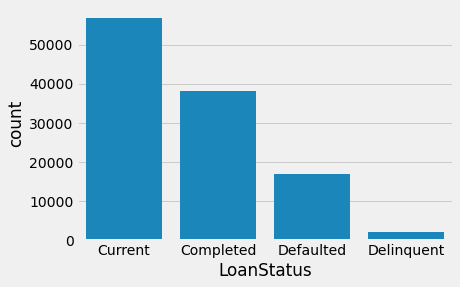

In [100]:
base_color = sb.color_palette()[0]

sb.countplot(data = data_loan, x = "LoanStatus", color=base_color, order=index);

**Observation:** Loans that are *currently* being paid take the highest count, while loans that have been completed come next.
We will plot the next barplot to show their individual contribution

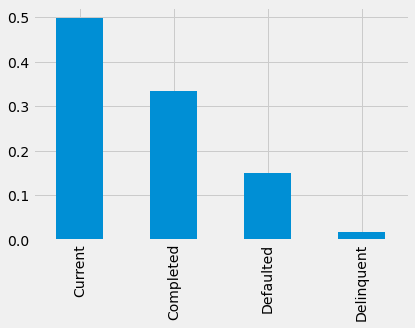

In [101]:
data_loan.LoanStatus.value_counts(normalize = True).plot(kind="bar");

Loans currently being paid are up to 50%. A question that arises might be to compare the properties of defaulted loans and completed loans and be able to eventually use this information to extrapolate loans that are currently being paid if they will default or not.
- A factor to consider is the term of their loan and at what point/what properties(Like DebttoIncome ratio) is responsible for people start to their loans.
- Also with the minimal amount of Delinquent loan present, I think it will be comfortable for analysis to include the Delinquent as Defaulted Loans. (Rename delinquent as Defaulted)

In [102]:
#Rename delinquent to Defaulted

data_loan["LoanStatus"] = data_loan["LoanStatus"].str.replace("Delinquent", "Defaulted")

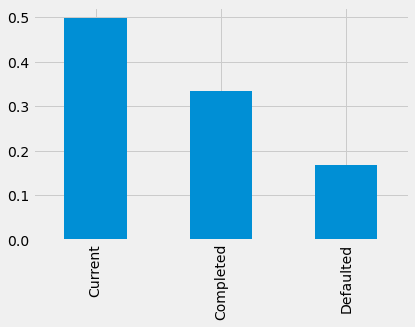

In [103]:
#make a replot
data_loan.LoanStatus.value_counts(normalize = True).plot(kind="bar");

The effect of adding the delinquent loans to defaulted loans is not much seen.

### Question
- How is the term column distributed? 

In [104]:
data_loan["Term"].describe()

count    113932.000000
mean         40.830460
std          10.436392
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

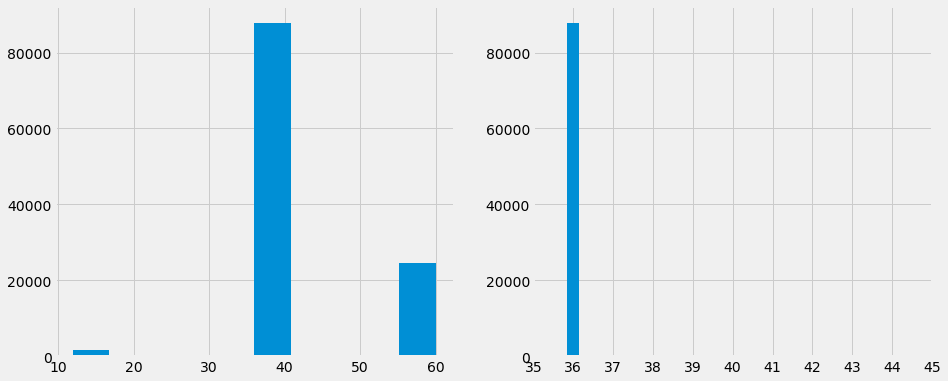

In [105]:
plt.figure(figsize = [14, 6])

plt.subplot(1, 2, 1)
#Term distribution for those who defaulted their loan
plt.hist(data = data_loan, x = "Term");

#Adjusted histogram plot to focus on the main bar as seen at the LHS
plt.subplot(1, 2, 2)
bins = np.arange(11.5, 60.5+1, 1)
plt.hist(data = data_loan, x = "Term", bins = bins, rwidth = 0.3)
plt.xticks(np.arange(12, 60+1, 1))
plt.xlim(35, 45);

Most of the loans borrowed are mostly in the 36 months time frame. In order to see this distribution properly, a countplot will be appropriate.

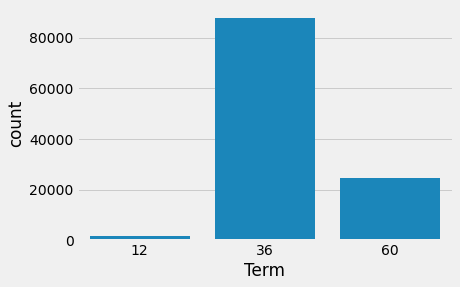

In [106]:
sb.countplot(data = data_loan, x = "Term", color= base_color);

**Observation**: We see that from the plot above, Prosper Loans are only between the first three odd years i.e. (Loans are only given for 1 year, 3 years or 5 years)

- One question can be to assess why some given loan terms are 3 or 5 years.

### Question
- What is the income distribution of borrowers.

In [107]:
data_loan["IncomeRange"].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

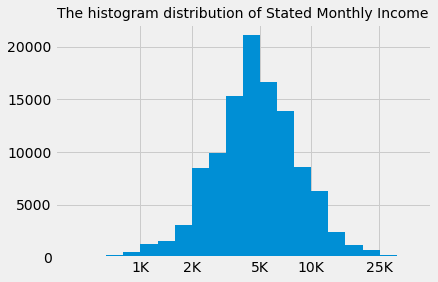

In [108]:
bins = 10**(np.arange(0, 7, 0.1))
plt.hist(data = data_loan, x = "StatedMonthlyIncome", bins = bins)
tick_count = np.array([2.5, 3.0, 3.3, 3.6, 4.0, 4.3, 4.6])
tick = [1000, 2000, 5000, 10000, 25000]
tick_label = ["1K", "2K", "5K", "10K", "25K"]
plt.xscale("log")
plt.xticks(tick, tick_label, rotation = 0)
plt.xlim(10**2.5, 10**4.7)

plt.title("The histogram distribution of Stated Monthly Income", fontsize = 14);

**Observation**: Most of the monthly income distribution is between the 1500 to 10,000 with very little after 10,000.
- The income distribution appears to be a normal distribution with its centre and modal value around 4K - 5K.

### Question
- Yearly count of loans and the change in the counts

In [109]:
#convert to datetime object

data_loan["ListingCreationDate"] = pd.to_datetime(data_loan["ListingCreationDate"], format= "%Y-%m-%d")

In [110]:
#Create ListingYear

data_loan["Listing_Year"] = data_loan["ListingCreationDate"].dt.year

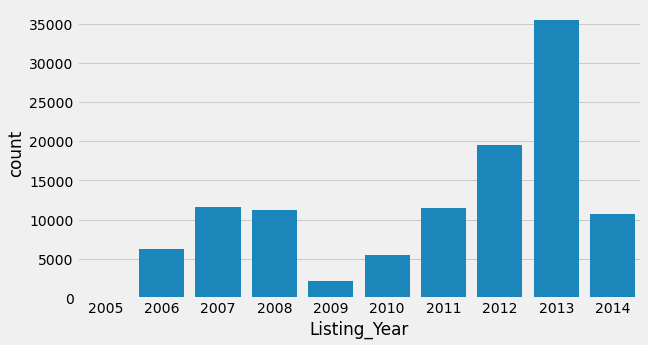

In [111]:
#Plot count of loans by year
plt.figure(figsize = [9, 5])
sb.countplot(data = data_loan, x = "Listing_Year", color=base_color)
plt.xticks(rotation = 0);

**Observation**

- There was a consistent increase from 2009 to 2013, and a serious decrease in 2014, which may be because the 2014 data is not complete yet.
- However, there was a noticeable drop in the 2009 data from 2008, which needs further investigation. It took about three years for ProsperLoan to come back to the same level of count as of 2008.
- Generally an upward trend is observable.

In [112]:
#Obtain maximum date of Creation Date
max(data_loan["ListingCreationDate"])

Timestamp('2014-03-10 00:00:00')

- As postulated that the reason for for 2014 data count to be reduced is because of incomplete record which we see when we check the maximum date in the listing creation data which shows that the maximum date is `2014-03-10` which is the 12th day of the 3rd month.

### Question
- The distribution of ProsperRating.

<AxesSubplot:xlabel='ProsperRating', ylabel='count'>

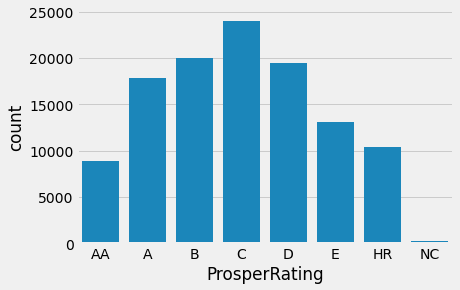

In [113]:
sb.countplot(data = data_loan, x = "ProsperRating", color= base_color)

**Observation:** There is somehow a normal distribution of the values with both extremes being lesser than the middle value risk (C).
- Contrary to normal thoughts where you would presume that more AA rating (Least Risky) loans should be given than more HR rating (Most Risky) loans, both type of loans carry just the similar amount of loans. Infact there are more HR rated loans than AA loans.
- This might suggest that Loan companies are not totally seeking to reject loans application based on their level of risk.

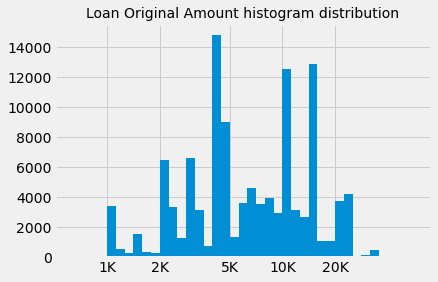

In [114]:
bin_edges = 10**(np.arange(2.8, 4.6+0.2, 0.05))
plt.hist(data = data_loan, x = "LoanOriginalAmount", bins = bin_edges)
plt.xscale("log")
ticks = [1000, 2000, 5000, 10000, 20000]
tick_labels = ["1K", "2K", "5K", "10K", "20K"]
plt.xticks(ticks, tick_labels)
plt.title("Loan Original Amount histogram distribution", fontsize = 14);

**Observation**: There are more loans after 5K than before 5K.

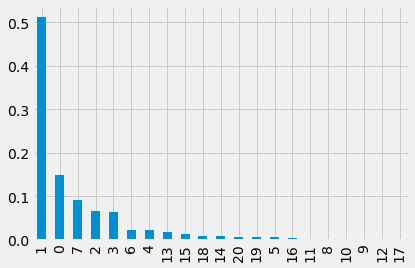

In [115]:
#What were loans borrowed for?
data_loan["ListingCategory (numeric)"].value_counts(normalize = True).plot(kind = "bar");

Most of the loans were borrowed for debt consolidation...

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>- The distribution of the term loan makes us realize that loans are only given on 1 or 3 or 5 years. 
>- The income distribution required a log scale transformation on the x-axis with most of its values between 1000 to 10000 dollars.
>- The Year 2009 is a very noticeable year where there was a record low of loan listing, which took up to three years to recover the given position. On further research we come to understand that was due to the market crash of 2009.
>- Most of the income distribution were between income earners of 2K to 10K.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- We had to add the delinquent loan status to defaulted loan as it was too small to stand on its own and meant tthe same thing with defaulted loans.
>- By count, the riskier loans seem to be the same distributed with less risky loans.

## Bivariate Exploration

### Question
- What is the relationship between Loan Original Amount and ProsperRating?

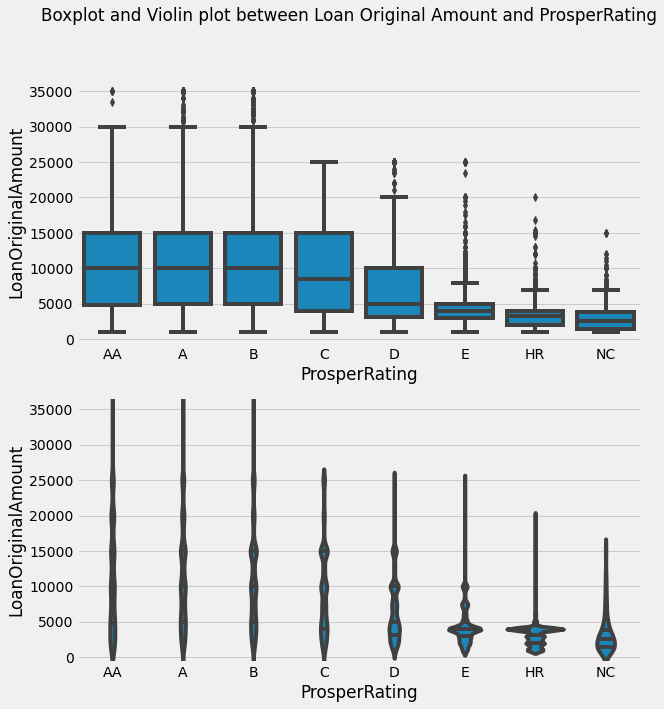

In [116]:
plt.figure(figsize = [9, 10])
plt.subplot(2, 1, 1)
ax1 = sb.boxplot(data = data_loan, x = "ProsperRating", y = "LoanOriginalAmount", color = base_color)

plt.subplot(2, 1, 2)
sb.violinplot(data = data_loan, x = "ProsperRating", y = "LoanOriginalAmount", color = base_color, inner = "quartile")
plt.ylim(ax1.get_ylim())

plt.suptitle("Boxplot and Violin plot between Loan Original Amount and ProsperRating");

**Observation**
- From the boxplot we can see a general decrease among the loan ratings, while AA, A, B loans have the similar boxplot distribution.
- The AA have the least number of outliers which speaks about how evenly their data is spread with very little amount of outliers.
- When we compare the HR and AA loans who have similar number of counts in the univariate plot we saw before now, we notice from the Violin plot that most HR rating loans are less than 5K and AA loans are fairly distributed accross a long range of loan borrowed.

Conclusion: As the risk increases the amount borrowed also decreases.

### Question

- What is the relationship between the Income earned and Loan amount given to different range of income earners?

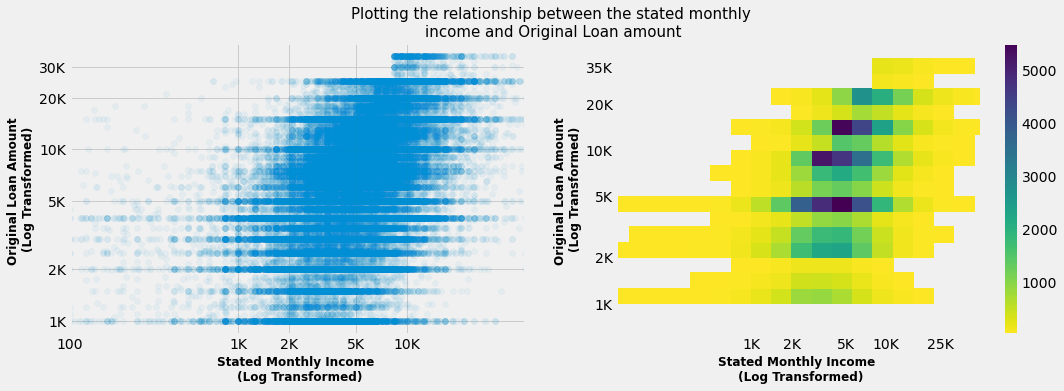

In [117]:
plt.figure(figsize = [16, 5])

plt.subplot(1, 2, 1)
ax1 = plt.scatter(data = data_loan, x = "StatedMonthlyIncome",  y = "LoanOriginalAmount", alpha = 1/20)
plt.xscale("log")
plt.yscale("log")
x_ticks = [10, 100, 1000, 2000, 5000, 10000]
x_labels = ["10", "100", "1K", "2K", "5K", "10K"]
y_ticks = [1000, 2000, 5000, 10000, 20000, 30000]
y_labels = ["1K", "2K", "5K", "10K", "20K", "30K"]
plt.xticks(x_ticks, x_labels)
plt.yticks(y_ticks, y_labels)
plt.xlabel("Stated Monthly Income \n (Log Transformed)", weight = "bold", fontsize = 12)
plt.ylabel("Original Loan Amount \n(Log Transformed)", weight = "bold", fontsize = 12)

plt.xlim(100, 50000)

##################################################
plt.subplot(1, 2, 2)
bin_x = 10**(np.arange(0, 7, 0.15))
bin_y = 10**(np.arange(2.8, 4.6+0.2, 0.1))
plt.hist2d(data = data_loan, x = "StatedMonthlyIncome",  y = "LoanOriginalAmount", 
           cmin = 10, cmap = "viridis_r", bins = [bin_x, bin_y])
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
y_ticks = [1000, 2000, 5000, 10000, 20000, 35000]
y_labels = ["1K", "2K", "5K", "10K", "20K", "35K"]
x_tick = [1000, 2000, 5000, 10000, 25000]
x_label = ["1K", "2K", "5K", "10K", "25K"]
plt.xticks(x_tick, x_label)
plt.yticks(y_ticks, y_labels)

plt.xlabel("Stated Monthly Income \n (Log Transformed)", weight = "bold", fontsize = 12)
plt.ylabel("Original Loan Amount \n(Log Transformed)", weight = "bold", fontsize = 12)

plt.xlim(100, 50000)

plt.suptitle("Plotting the relationship between the stated monthly \nincome and Original Loan amount", fontsize = 15);

**Observation**
- There is no obvious relationship between the Loan given and stated monthly income at first, but the heatmap reveals something.
- The heatmap makes us to see that most loan activities are between monthly earners of 2K and and 10K.
- Most borrowing activity happens around loan amount of 5K.
- And as we increase in the amount borrowed (y-axis), less than 5K salary earners tend to decrease while higher salary earners tend to increase.
- However monthly income earners between 5K and 10K tend to keep going up the ladder and are the highest borrowers in almost all range
- 4K - 5K earners are more likely to borrow 5K or more.

### Question

- What is the relationship between the Income and ProsperRating?

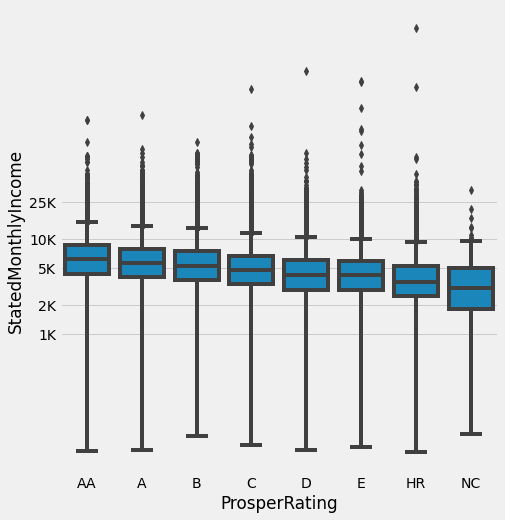

In [118]:
plt.figure(figsize = [7, 8])
#plt.subplot(2, 1, 1)
sb.boxplot(data = data_loan[data_loan.StatedMonthlyIncome > 50], x = "ProsperRating", y = "StatedMonthlyIncome", color = base_color)
plt.yscale("log")
y_tick = [1000, 2000, 5000, 10000, 25000]
y_label = ["1K", "2K", "5K", "10K", "25K"]
plt.yticks(y_tick, y_label);

**Obseravtion**
- The median gradually drops in the stated monthly income as the risk increases.
- The median of AA rated loans is above 5K and towards 8K while that of HR rated loans are below 5K but not up to 2K...

### Question
For more support information we need to check the distribution of the income faceted by the different ProsperRating.

<Figure size 864x504 with 0 Axes>

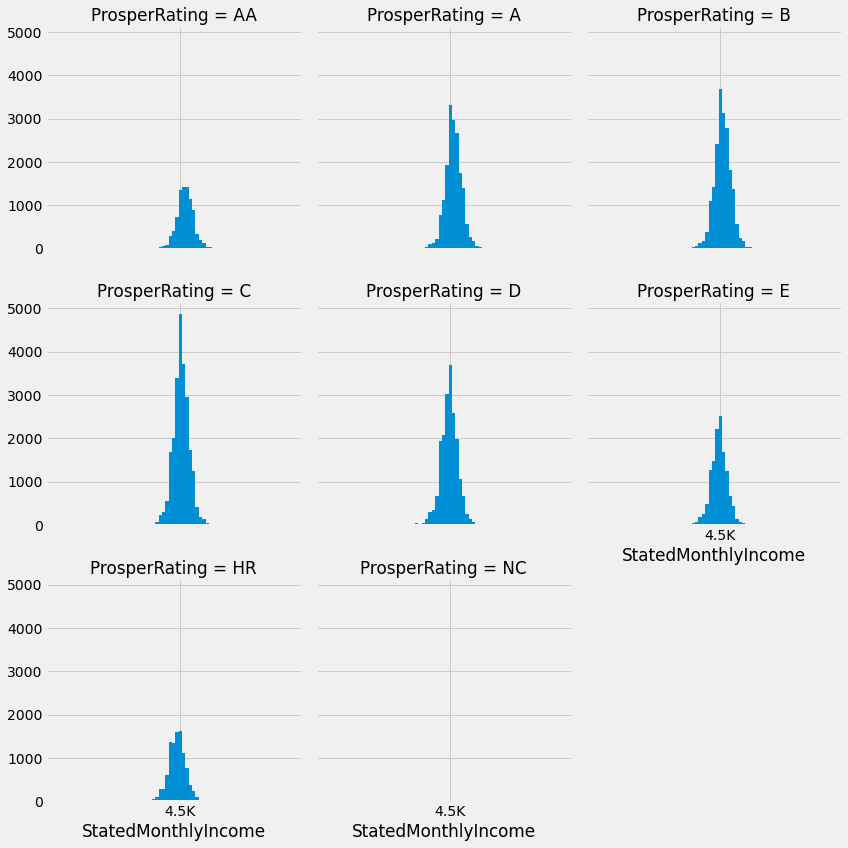

In [119]:
plt.figure(figsize = [12, 7])
bins = 10**(np.arange(0, 7, 0.1))
col_order = ["AA", "A", "B", "C", "D", "E", "HR", "NC"]
fg = sb.FacetGrid(data = data_loan, col = "ProsperRating", col_wrap= 3, size=4)
fg.map(plt.hist, "StatedMonthlyIncome", bins = bins)
plt.xscale("log")
tick = [4500]
tick_label = ["4.5K"]
plt.xticks(tick, tick_label)
plt.xticks();

**Observation**

- From the distribution, we see that more highly risky loans (i.e. after C rated loans) income earners earn less than 4.5K, and less risky loans (AA, A, B rated loans) income earners earn well above 4.5K.
- Income that you earn plays an important role in the risk attached to such loans.

Listing category, LoanStatus and LoanOriginal Amount

### Question
- What is the relationship between the Rating of a loan and the Loan Status?

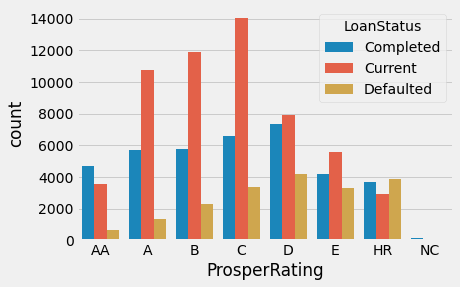

In [120]:
sb.countplot(data = data_loan, x = "ProsperRating", hue = "LoanStatus");

Taking the plot of the raw counts of the individual Prosperrating with the loan status can be deceptive as it does not take into consideration the difference in the counts of each prosper rating group.

It becomes important to make a plot that takes into relative count of each Rating group to be able to draw out a proper conclusion.

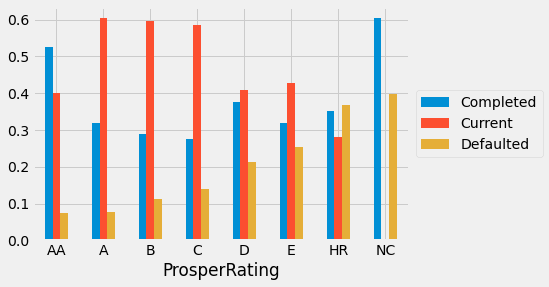

In [121]:
data_loan.groupby("ProsperRating")["LoanStatus"].value_counts(normalize = True).unstack("LoanStatus").plot(kind = "bar")
plt.xticks(rotation = 0)
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5));

- We see that Defaulted loan status increases with increasing Risks. More than 40% of HR rated risks got defaulted and only less than 10% of AA and A rated loans have been defaulted.
- Completed Loans decreases with increasing risk until C-rated loans, where the ratio of completed loans then somewhat increases among high-risk loans.
- The reason could be because of the rating they issue in recent Years are more towards the less risk loans (which contributes to the ratio of current loans being paid and reduce the ratio of complete loans in the less risk loans), let us check that below.

<Figure size 504x576 with 0 Axes>

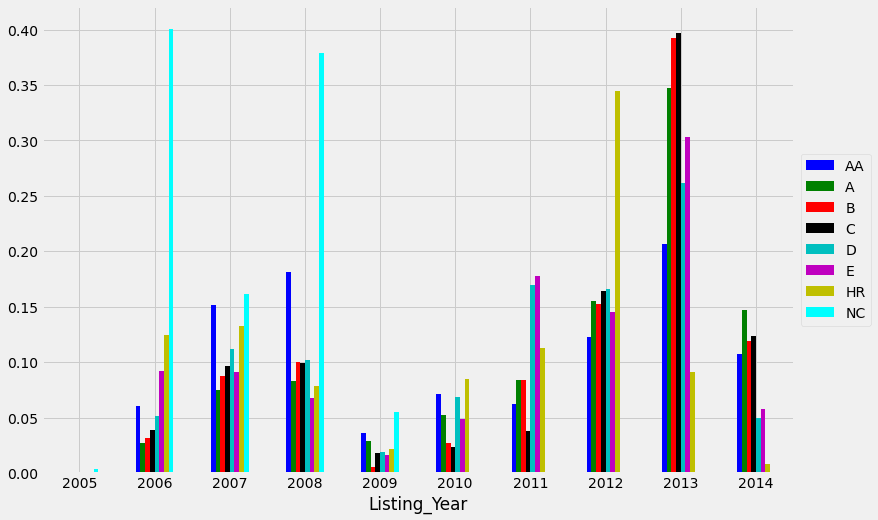

In [122]:
plt.figure(figsize = [7, 8])
data_loan.groupby("ProsperRating")["Listing_Year"].value_counts(normalize = True).unstack("ProsperRating").plot(kind = "bar",
                                                                                                                figsize = [12, 8],
                                                                                                               color = {"AA":"b",
                                                                                                                       "A": "g",
                                                                                                                       "B": "r",
                                                                                                                       "C": "k",
                                                                                                                       "D": "c",
                                                                                                                       "E": "m",
                                                                                                                       "HR": "y",
                                                                                                                       "NC": "cyan"})
plt.xticks(rotation = 0)
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5));

From what we see above, there is quite an interesting information as seen.
> We demarcate `low risk loans` and `high risk loans` by the black bar which represents the C-rated loans.
- First year in and year out, there are usually more highly risky loans than less risky loans until 2013.
- Significantly also HR type of loan also dropped after 2012.
- When ProsperLoans startted out in 2005 till 2009, the highest percentage of Loans were given to entities without a CreditGrade (NC).
- However, after 2009, there was no NC(No credit Grade) loan given out again.

We need to see the the loan status for each year to be able to give further insights.

### Question 
Amount of Current Loans by ProsperRating?

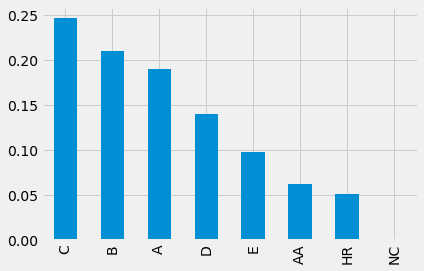

In [123]:
data = data_loan[data_loan["LoanStatus"] == "Current"]

data["ProsperRating"].value_counts(normalize = True).plot(kind = "bar");

**Observation**
- We can see that the  top 3 bars which contribute about 60% of the current loans are low risk loans.
- In most recent years, loans have been safer compared to before.
- In our multivariate analysis, we might want to investigate the relationship between the year, rating and loan status.

### Question
- Relationship between the term of a loan and year

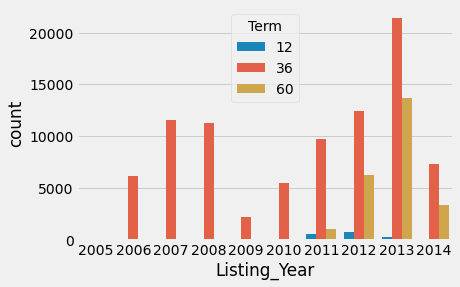

In [124]:
sb.countplot(data=data_loan, x = "Listing_Year", hue = "Term");

 From the plots above we do see that the five year(60 months) term only started in 2011 with 1 year term also, but it the 5 years term became more adopted than the 1 year term and it continued to grow (Until 2014, where we understand that it's not a complete year yet).

### Question
- Relationship between the BorrowerAPR and Year.

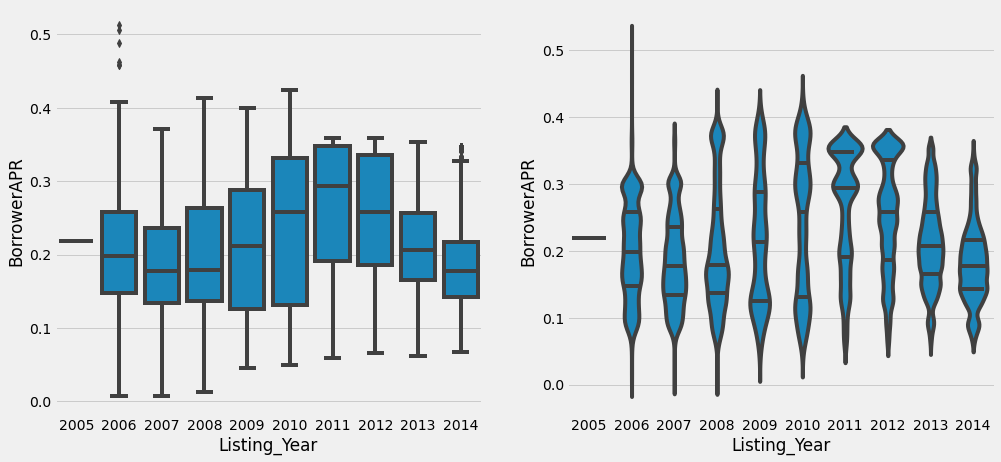

In [125]:
plt.figure(figsize = [15, 7])

plt.subplot(1, 2, 1)
sb.boxplot(data = data_loan, x = "Listing_Year", y = "BorrowerAPR", color = base_color)

plt.subplot(1, 2, 2)
sb.violinplot(data = data_loan, x = "Listing_Year", y = "BorrowerAPR", color = base_color, inner = "quartile");

**Observation:**
- We observe an interesting plot with boxplot above as there seem to be periodical change.
- There was decrease between 2006 - 2008, then increasing trend to 2011, then another decrease in trend up till 2013
We can carry out a multivariate analysis using: Income, BorrowerAPR, LoanAmount. or some other combination like year, borrowerAPR and LoanAmount to understand why the reason for this distribution.

- However we see a similar distribution as above in the Prosperrating and Year, so I will try to inspect the relationship between ProsperRating and BorrowerAPR.

**Question**
- Loan Amount for Each Year, as a sort of metric for the success of prosper Loan.

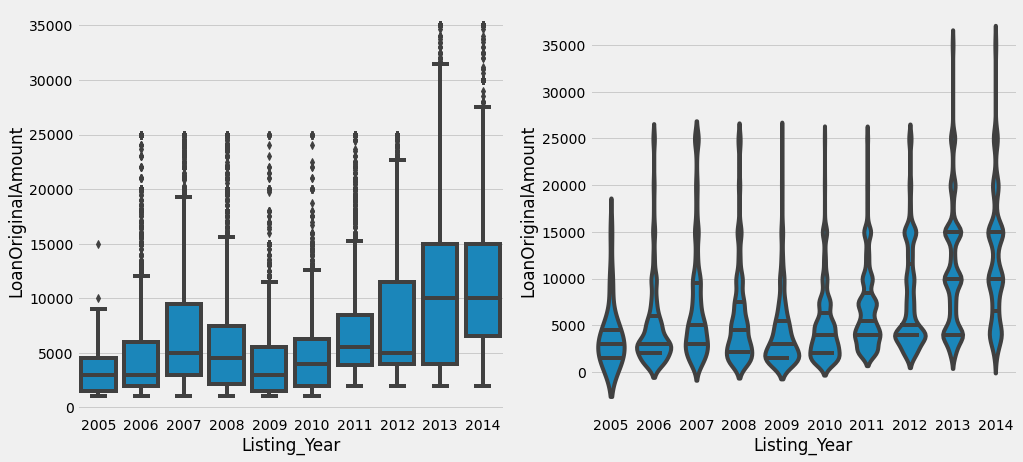

In [126]:
plt.figure(figsize = [15, 7])

plt.subplot(1, 2, 1)
sb.boxplot(data = data_loan, x = "Listing_Year", y = "LoanOriginalAmount", color = base_color)

plt.subplot(1, 2, 2)
sb.violinplot(data = data_loan, x = "Listing_Year", y = "LoanOriginalAmount", color = base_color, inner = "quartile");

**Observation**
- There was a staggering at the beginning from 2005 coupled with the market downturn of 2008/2009
- The plot shows a general increase from 2009.
- The violin plot shows that there is a change in the amount being borrowed in recent years, as more amounts have been borrowed compared to the previous years modes of < 5K.
- Recent years have multiple modes of loan amount that spreads up to a higher loan amount.

**Question**
- What is the relationship between prosperRating and the BorrowerAPR

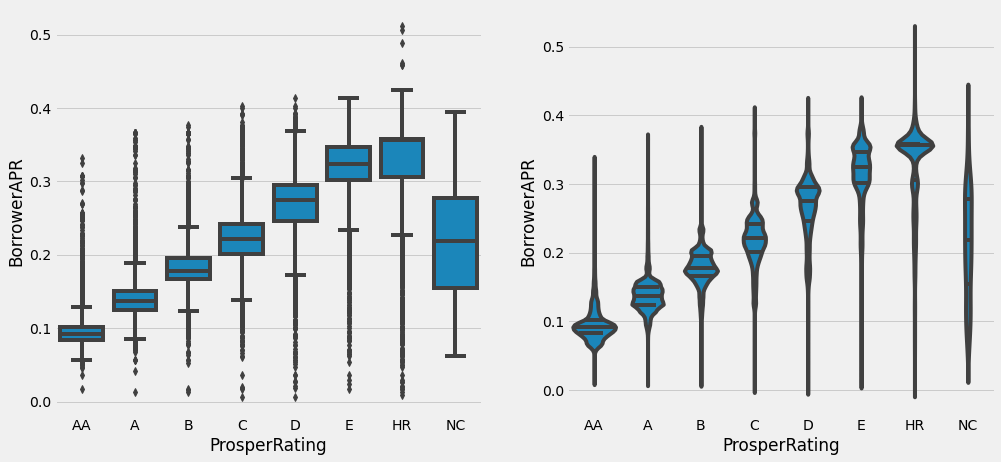

In [127]:
plt.figure(figsize = [15, 7])
plt.subplot(1, 2, 1)
sb.boxplot(data = data_loan, x = "ProsperRating", y = "BorrowerAPR", color = base_color)

plt.subplot(1, 2, 2)
sb.violinplot(data = data_loan, x = "ProsperRating", y = "BorrowerAPR", color = base_color, inner = "quartile");

**Observation**
- There is higher BorrowerAPR attached to highly risked loans

- A multivariate relationship between Year, Rating and Borrower APR might be a useful relationship to explore.

### Question
- Relationship between LoanStatus and Loanoriginal AMount

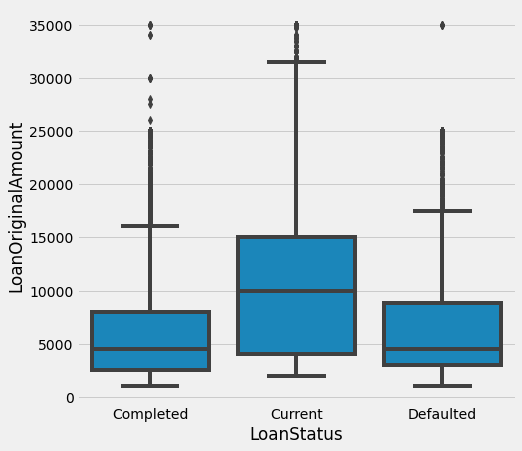

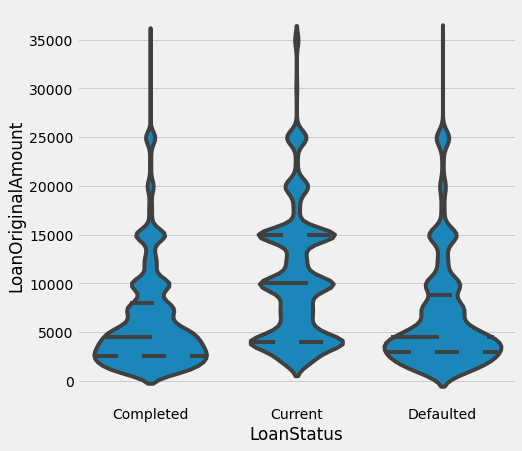

In [128]:
plt.figure(figsize = [7, 15])
plt.subplot(2, 1, 1)
sb.boxplot(data = data_loan, x = "LoanStatus", y = "LoanOriginalAmount", color = base_color)
#plt.yscale("log")
y_tick = [1000, 2000, 5000, 10000, 25000]
y_label = ["1K", "2K", "5K", "10K", "25K"]
#plt.yticks(y_tick, y_label)

plt.figure(figsize = [7, 15])
plt.subplot(2, 1, 2)
sb.violinplot(data = data_loan, x = "LoanStatus", y = "LoanOriginalAmount", 
              color = base_color, inner = "quartile");

>- There is no remarked difference between the loans that have been completed and the loans that have been defaulted in their distribution of LoanOriginal Amount
>- However, the current loans show that there is a change in the loan original amount currently borrowed as current loans are trimodal at some point below 5K, around 10K and around 15K.

### Question
- Explore the relationship between the BorrowerAPR and LoanOriginal Status.

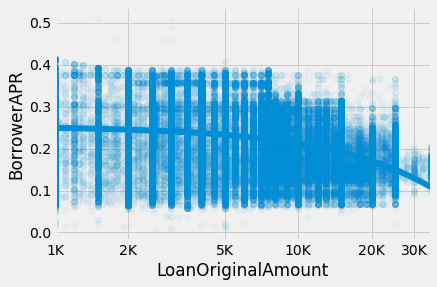

In [129]:
sb.regplot(data=data_loan, x = "LoanOriginalAmount", y = "BorrowerAPR", scatter_kws={"alpha": 1/30}, x_jitter=0.3)
plt.xscale("log")
x_ticks = [1000, 2000, 5000, 10000, 20000, 30000]
x_labels = ["1K", "2K", "5K", "10K", "20K", "30K"]
plt.xticks(x_ticks, x_labels);

**Observation**
- We notice that with increasing Loan amount, the BorrowerAPR tend to reduce.

(0.0, 0.75)

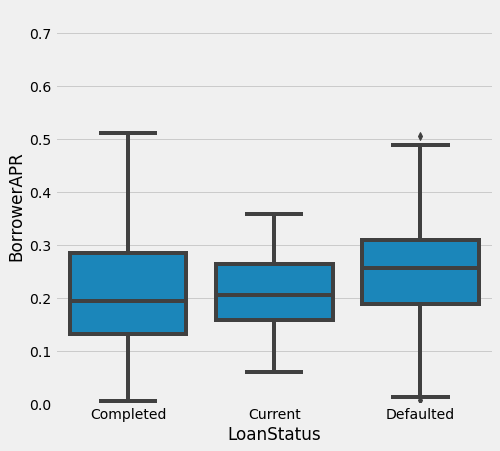

In [130]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = [7, 15])
plt.subplot(2, 1, 1)
sb.boxplot(data = data_loan, x = "LoanStatus", y = "BorrowerAPR", color = base_color)
#plt.yscale("log")
y_tick = [1000, 2000, 5000, 10000, 25000]
y_label = ["1K", "2K", "5K", "10K", "25K"]
#plt.yticks(y_tick, y_label)
plt.ylim(0, 0.75)

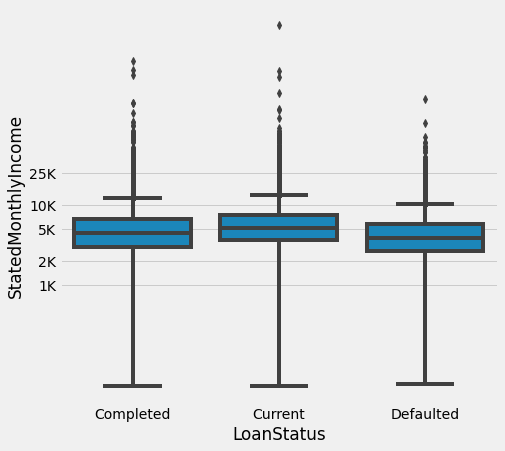

In [131]:
plt.figure(figsize = [7, 15])
plt.subplot(2, 1, 1)
sb.boxplot(data = data_loan[data_loan.StatedMonthlyIncome > 50], x = "LoanStatus", y = "StatedMonthlyIncome", color = base_color)
plt.yscale("log")
y_tick = [1000, 2000, 5000, 10000, 25000]
y_label = ["1K", "2K", "5K", "10K", "25K"]
plt.yticks(y_tick, y_label);

**Observation:** 
- From the above we can see that the median of those that have completed and defaulted their loans is between 2K and 5K, while those we have defaulted have a lower but very similar income median.
- Also the median of current loans being paid is above 5K which is a reflection of most recent loans. (The change in income distribution of borrowers from prosper Loans might have become positive over the years)

We might want to check how the DebttoIncome ratio plays a role in the status of a Loan.

### Question

- The relationship between DebttoIncome ratio and LoanStatus/ProsperRating

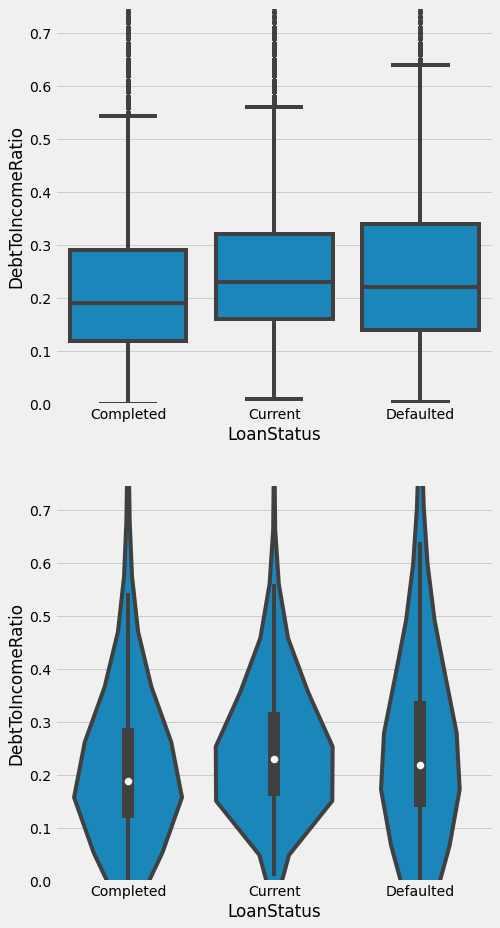

In [132]:
plt.figure(figsize = [7, 15])
plt.subplot(2, 1, 1)
sb.boxplot(data = data_loan[data_loan.DebtToIncomeRatio > 0], x = "LoanStatus", y = "DebtToIncomeRatio", color = base_color)
#plt.yscale("log")
y_tick = [1000, 2000, 5000, 10000, 25000]
y_label = ["1K", "2K", "5K", "10K", "25K"]
#plt.yticks(y_tick, y_label)
plt.ylim(0, 0.75)

plt.subplot(2, 1, 2)
sb.violinplot(data = data_loan[data_loan.DebtToIncomeRatio > 0], x = "LoanStatus", y = "DebtToIncomeRatio", color = base_color)
#plt.yscale("log")
y_tick = [1000, 2000, 5000, 10000, 25000]
y_label = ["1K", "2K", "5K", "10K", "25K"]
#plt.yticks(y_tick, y_label)
plt.ylim(0, 0.75);

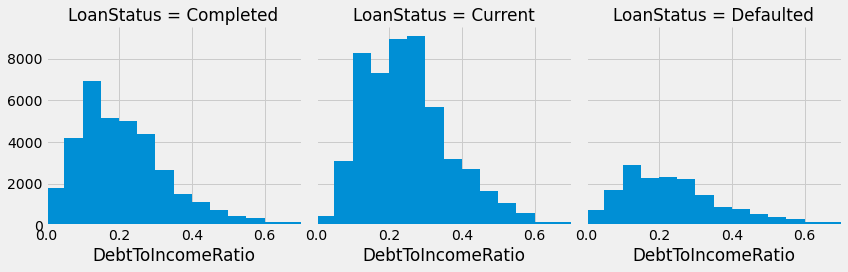

In [133]:
#The distribution of DebttoIncomeRatio accross all three loan statuses
bins = np.arange(0, 2.2, 0.05)
fg = sb.FacetGrid(data = data_loan, col = "LoanStatus", size=4)
fg.map(plt.hist, "DebtToIncomeRatio", bins = bins)
plt.xlim(0, 0.7);

**Obseravtion**
- In the relationship of the DebttoIncome Ratio with the Loan Status, there was no thorough observation made, however we noticed that in the current loans, the debttoIncome ratio is trimodal or bimodal, where there is high activity of debttoincome ratio of > 0.2 which is not observed in the previous kind of loans (Defaulted and Completed)

(0.0, 0.75)

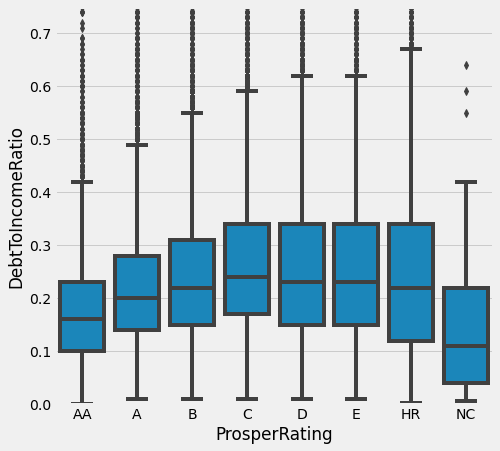

In [134]:
plt.figure(figsize = [7, 15])
plt.subplot(2, 1, 1)
sb.boxplot(data = data_loan[data_loan.DebtToIncomeRatio > 0], x = "ProsperRating", y = "DebtToIncomeRatio", color = base_color)
#plt.yscale("log")
y_tick = [1000, 2000, 5000, 10000, 25000]
y_label = ["1K", "2K", "5K", "10K", "25K"]
#plt.yticks(y_tick, y_label)
plt.ylim(0, 0.75)

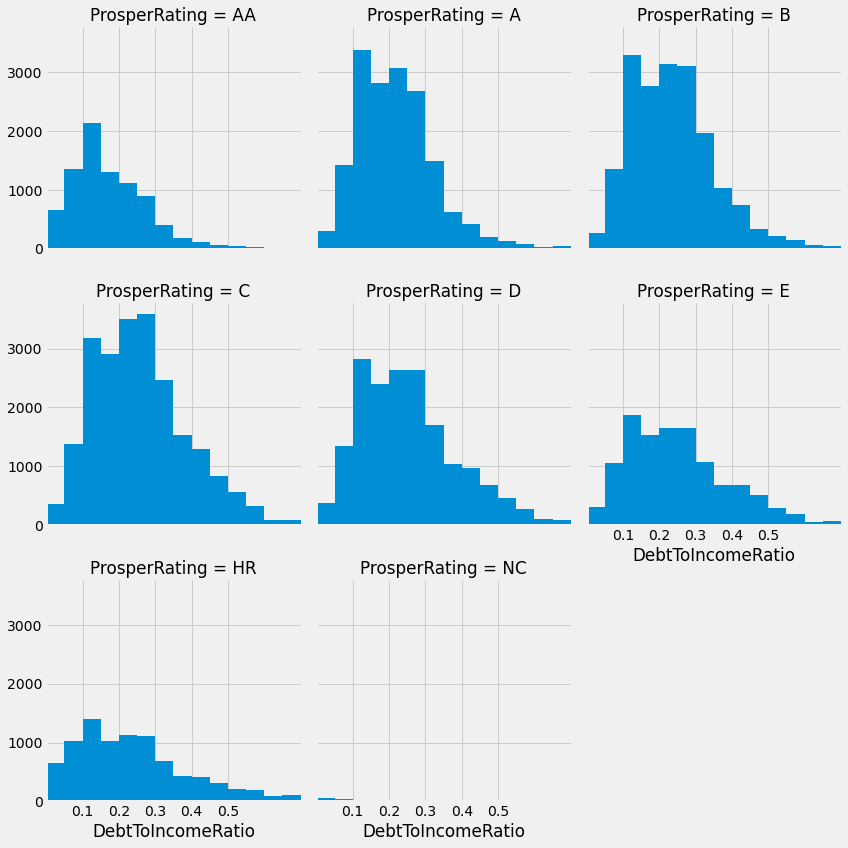

In [135]:
#The distribution of DebttoIncomeRatio accross all three loan statuses
plt.style.use("fivethirtyeight")
bins = np.arange(0, 2.2, 0.05)
tick = np.arange(0.1, 0.6, 0.1)
label = ["{:.1f}".format(v) for v in tick]
fg = sb.FacetGrid(data = data_loan, col = "ProsperRating", size=4, col_wrap= 3)
fg.map(plt.hist, "DebtToIncomeRatio", bins = bins)
fg.set(xticks = tick, xticklabels = label)
plt.xlim(0, 0.7);

### Question
- What is the realtionship between Income and Year?

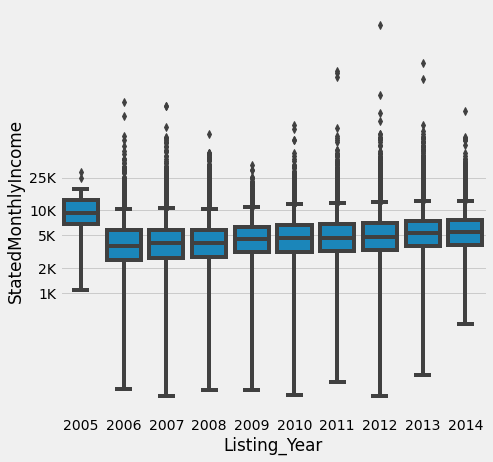

In [136]:
plt.figure(figsize = [15, 7])

plt.subplot(1, 2, 1)
sb.boxplot(data = data_loan[data_loan.StatedMonthlyIncome > 50], x = "Listing_Year", y = "StatedMonthlyIncome", color = base_color)
plt.yscale("log")
y_tick = [1000, 2000, 5000, 10000, 25000]
y_label = ["1K", "2K", "5K", "10K", "25K"]
plt.yticks(y_tick, y_label);

**Observation**
- The median stated income of borrowers has increased over the years.
- This supports the information that there have been growth at Prosperloans over the years. 

Let us engineer a new feature called the revolve ratio that measures how much of a persom income goes to revolving accounts payment. A higher Revolve ratio would indicate that a person is has much of his income goint to the revolve payment.

In [137]:
#Engineer Feature

data_loan["RevolveRatio"] = data_loan["OpenRevolvingMonthlyPayment"]/data_loan["StatedMonthlyIncome"]

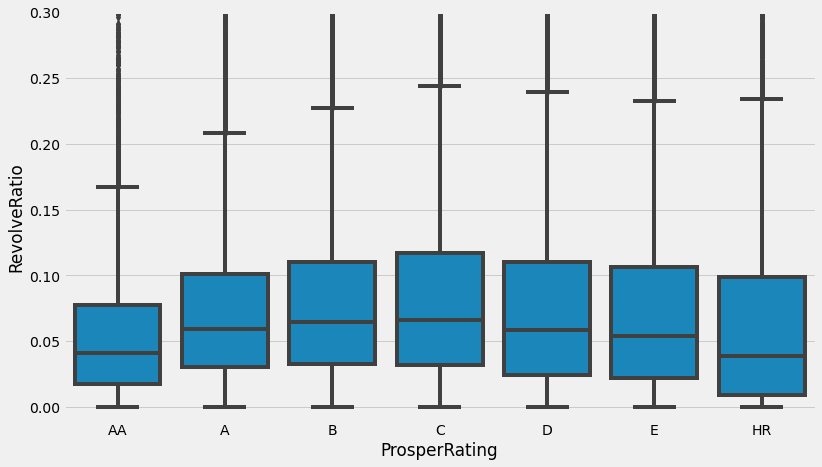

In [138]:
#Plot Box plot of relationship between Revolve ratio and risk

plt.figure(figsize = [12, 7])
sb.boxplot(data=data_loan[data_loan.RevolveRatio != np.inf], x = "ProsperRating", y = "RevolveRatio", color=base_color)
plt.ylim(-0.01, 0.3)
plt.xlim(-0.5, 6.5);

We spot an interesting relationship that revolve ratio increases as expected with incresing risk, however it shows that as it crosses the C-rated loans the revolve ratio begins to drop.
Remember, however that high risk loans are often in the region of low incomes and thus might not have access to have many revolving accounts.

In the further multi variate vizualization we would try to include the LoanStatus to this particular mix to see how the rating and revolving ratio affects the Loan Status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> Most observed relationships have been duly documented under each plot but some seemingly distinct ones might be pulled out in this summarizing obseravtion.
>- Although when we check the univariate count plot of the rating, AA and HR loans have similar number of counts The Loan amount by different prosper rating reduces with increasing risk from AA(least risky) to HR (Highly Risky).
>- Defaulted loans increase with increasing risk.
>- Income earners below 4.5K tend to have a higher risk associated to their loan and also tend to borrow more
>- 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>- The 1 and 5 year loan terms only began in 2011, while the 5 year loan term to be rising, the 1 year loan term has not been easily adopted.


## Multivariate Exploration

### Question
>- What is the relationship between ProsperRating, LoanStatus and Income?

In [139]:
data10 = data_loan[data_loan.StatedMonthlyIncome.between(2000, 11000)]

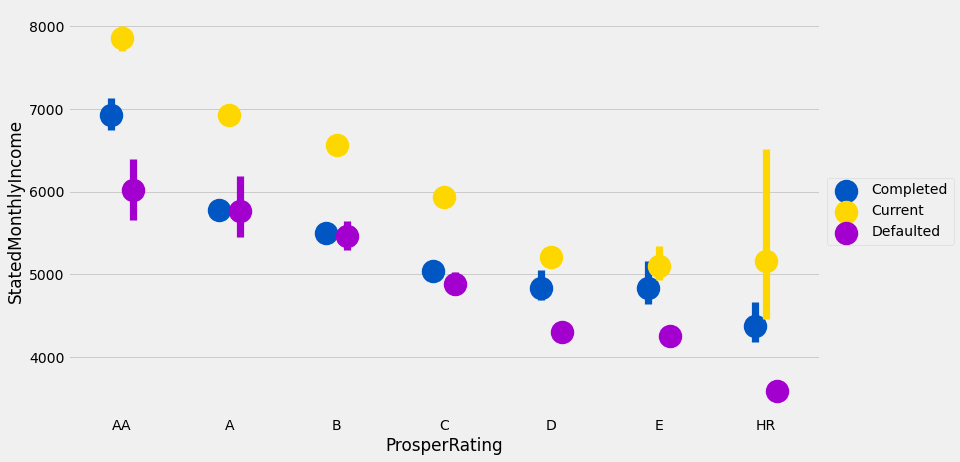

In [140]:
plt.figure(figsize = [12, 7])
sb.pointplot(data=data_loan[data_loan.ProsperRating != "NC"], 
             x = "ProsperRating", y = "StatedMonthlyIncome", hue = "LoanStatus", dodge = 0.2, linestyles="", palette="prism")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlim(-0.5, 6.5);

Since we know that current loans have a characteristics higher loan amounts and higher income, let us subset the data set to be less than 2012

In [141]:
data_year = data_loan[data_loan.Listing_Year < 2012]

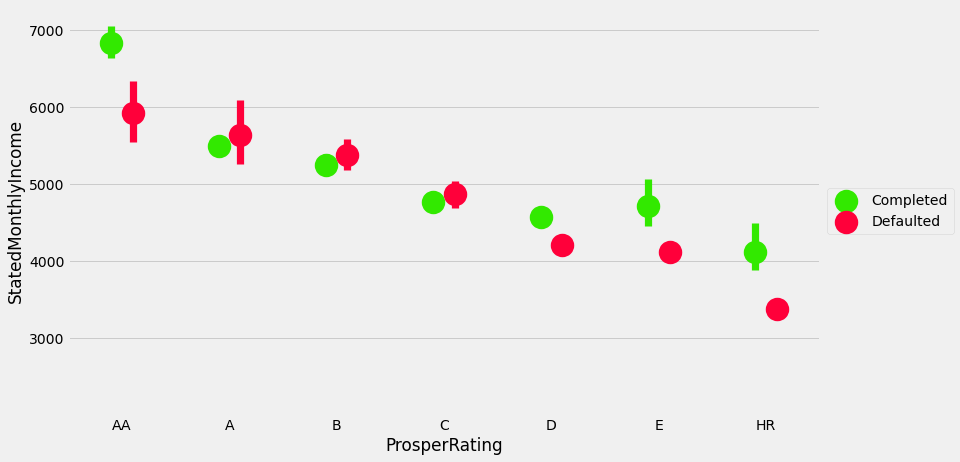

In [142]:
plt.figure(figsize = [12, 7])
sb.pointplot(data=data_year[data_year.LoanStatus != "Current"], 
             x = "ProsperRating", y = "StatedMonthlyIncome", hue = "LoanStatus", dodge = 0.2, linestyles="", palette="prism")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlim(-0.5, 6.5);

**Observation**
- At first we do see that there is general higher income earners for those who have completed their loans compared to those who have defaulted on the loan. However this particular characteristics seemed silent among loan ratings between A to C (or > 5000 and < 6000). The characteristics trend of completed loans having higher average higher income than defaulted loans resumes after average < 5K and for Rating D to HR.

### Question
- What is the relationship between the loan borrowed, rating and loan status (After subsetting for 2012 and below)

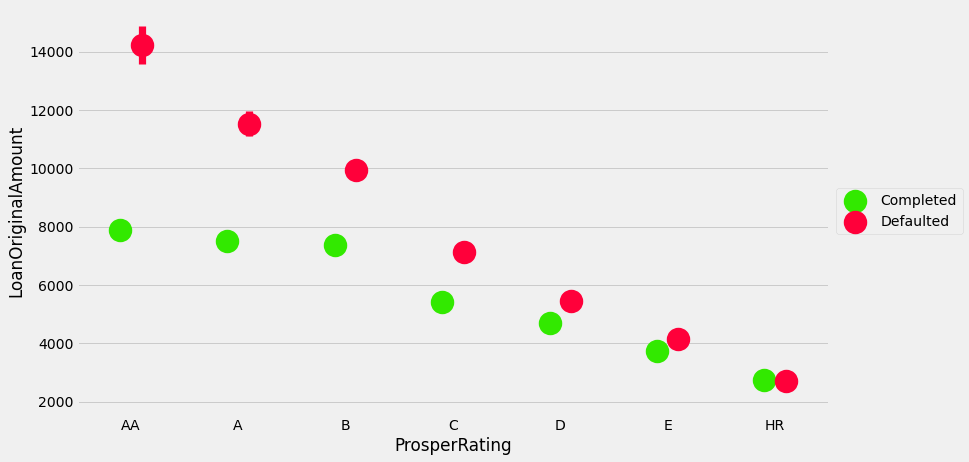

In [143]:
data_year = data_loan[data_loan.Listing_Year < 2012]

plt.figure(figsize = [12, 7])
sb.pointplot(data=data_year[data_year.LoanStatus != "Current"], 
             x = "ProsperRating", y = "LoanOriginalAmount", hue = "LoanStatus", dodge = 0.2, linestyles="", palette="prism")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlim(-0.5, 6.5);

**Observation**
- This plot shows that there is a high range of loan amount borrowed for low risk loans and the difference between defaulters and those who completed their loans converge as the risk increases. This means that as the loan gets more risky, the rating of the loan and income of the earner determines whether a loan will be defaulted or not. As the risk reduces however i.e(HR back to AA), the amount borrowed plays a key role in whether the loan will be defaulted or not.

### Question
What is the relationship between ProsperRating, BorrowerAPR and LoanStatus?

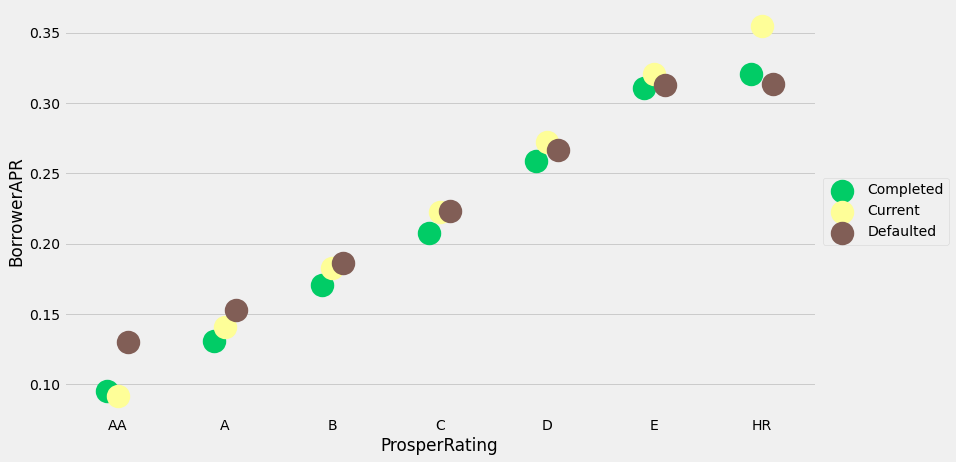

In [144]:
plt.figure(figsize = [12, 7])
sb.pointplot(data=data_loan[data_loan.ProsperRating != "NC"], 
             x = "ProsperRating", y = "BorrowerAPR", hue = "LoanStatus", dodge = 0.2, linestyles="", palette="terrain")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlim(-0.5, 6.5);

**Observation**
- AA rated loans and HR rated loans are two extremes that is valid for comparison even between middle ProsperRatings (A to E).
- AA rated loans defaulters have their average BorrowerAPR higher comapred to those who have completed their loans.
- While in HR rated loans, Defaluters have their BorrowerAPR slightly less than those who have completed their loans. This reflects that highly risky loans have more APR attached to them, regardless of their income, because HR income earners as seen in a bivariate plot above earn mostly less than 6K.

- On a general note those who have deafulted in each category are attached to higher APR in each category but as soon as the APR crosses the 0.30 threshold, the trend did not hold again and it did not matter for high risk loans (which are synonymos to low income loans) to default or complete their loans.

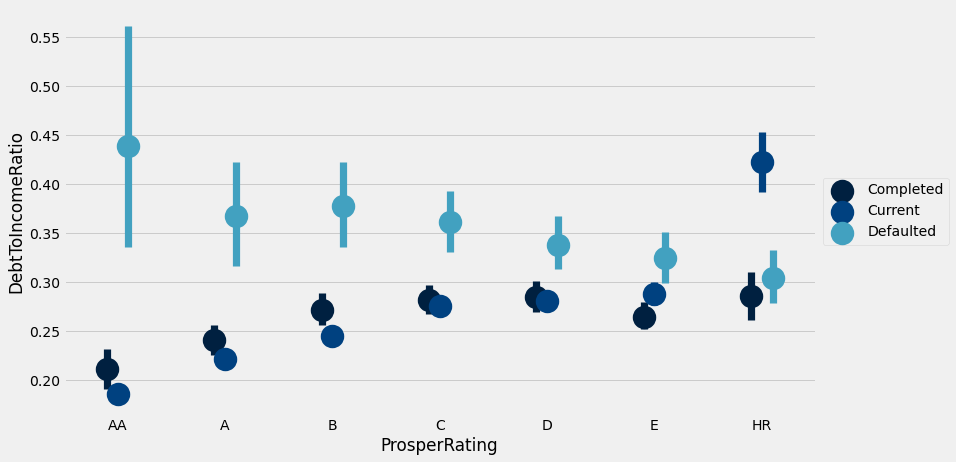

In [145]:
plt.figure(figsize = [12, 7])
data_debt = data_loan[data_loan.DebtToIncomeRatio >= 0]  #Using A debt_to_income ratio > 0
sb.pointplot(data=data_debt[data_debt.ProsperRating != "NC"], 
             x = "ProsperRating", y = "DebtToIncomeRatio", hue = "LoanStatus", dodge = 0.2, linestyles="", palette="ocean")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlim(-0.5, 6.5);

**Observation**
- The Debt to income ratio of deafulters in AA rated loans is way higher than those who have completed them.
- However, defaulters Debt to income ratio decreases as the loans gets towards highly risky(HR), which shows that the higher the risk, the more strict DebtToIncome ratio is allowed to be given loans. This might be to compensate for the risk of the loan.
- However, current HR loans are seen in the high Debt to income ratio of defaulters, which is unusual.
- We do also see that the current loan increases in their debt to income ratio as the risk increases. i.e. AA risk loans have most of their current loans have a low Debt to Income Ratio and HR rated loans have their current loans have a very high debt to income ratio.

### Question

What is the Relationship between the LoanStatus, Prosperrating and RevolveRatio

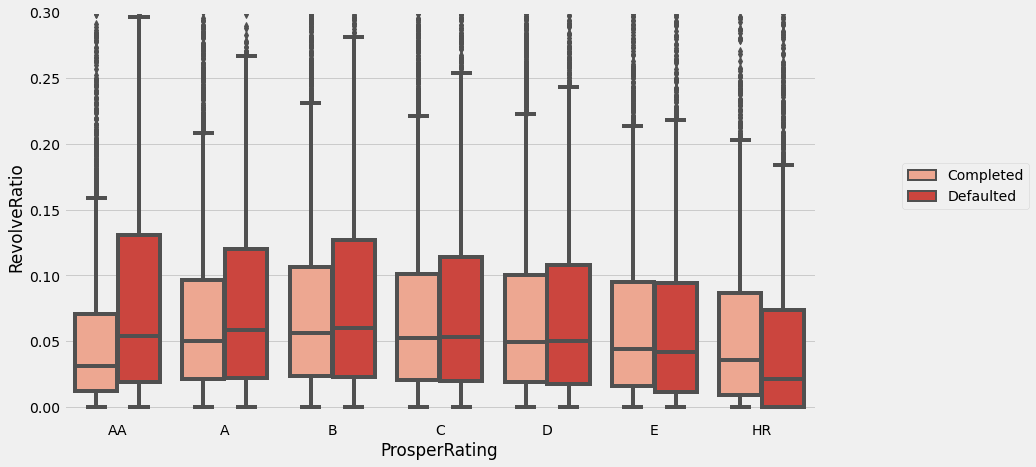

In [146]:
#Plot Box plot of relationship between Revolve ratio and risk

plt.figure(figsize = [12, 7])
sb.boxplot(data=data_loan[data_loan.LoanStatus != "Current"], x = "ProsperRating",
           y = "RevolveRatio", hue = "LoanStatus", palette= "Reds")
plt.ylim(-0.01, 0.3)
plt.xlim(-0.5, 6.5)
plt.legend(loc = 8, bbox_to_anchor = (1.2, 0.5));

In this Boxplot Relationship we see that revolve ratio of completed loans are lower than defaulted loans which tells that those who have lower revolve ratio (i.e those that spend lesser percentage of their monthly income on revolving accounts repayments) usually complete their loans than those who have a higher percentage. However, this tend seems to change as we cross over the C-rating loans (Mid Rated loans) and the the RevolveRatio of defaulted loans tend to be lower than the completed loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>- Generally, higher income individuals in each rating group complete their loans i.e. in HR rated loans, those who earn fairly higher are seen to complete their loans compared to those who earn lower.
>- The DebtToIncome ratio shows that the higher the risk, the more careful prosperloans are with loaning out when comparing the debt to income ratios.
>- At point after C, we see that riskier loans that have been completed or defaulted all fall below 5K. (To reflect that higher risks are often associated with low income earners.)

### Were there any interesting or surprising interactions between features?

>-  The reduced debt to income ratio seem to be a compensation for the high risk features.
>- The Boxplot Comparism of Prosperrating and LoanStatus with their Revolve Ratio is an interesting Raction that shows the behaviours of defaulters of highly risked loans.

## Conclusions
> The data exploration so far has been well documented and the focus has been on the main features and their interactions with other features.
>- We do discover the risk associated to a loan is dependent on the Income of the individual makeing the loans. We also come to realize that from 2013, prosper loans have tried to play their loaning to be safer than before and the amount  borrowed out and income earners that are currently paying back their loans have incresed.
>- Also the debt to income ratio for the different categories of risk becomes stricter as the level of the risk increases and liberal as the levle of risk is lower.

In [151]:
#Save the file

data_loan.to_csv("Dataset/data_clean", index = False)